## Objectives:
- To predict which customer is more likely to purchase the newly introduced travel package.

## Data
</b>Tourism.xlsx</b> - contains customer information of "Visit with us."

<b>Customer details:</b>
- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

<b>Customer interaction data:</b>
- PitchSatisfactionScore: Sales pitch satisfaction score
- ProductPitched: Product pitched by the salesperson
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- DurationOfPitch: Duration of the pitch by a salesperson to the customer

### Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings

### Read the dataset

In [2]:
tourism_data = pd.read_excel("Tourism.xlsx",sheet_name=1)
df = tourism_data.copy()

### View the dataset

In [3]:
df.head()

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0      200000          1  41.0     Self Enquiry         3              6.0   
1      200001          0  49.0  Company Invited         1             14.0   
2      200002          1  37.0     Self Enquiry         1              8.0   
3      200003          0  33.0  Company Invited         1              9.0   
4      200004          0   NaN     Self Enquiry         1              8.0   

       Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0        Salaried  Female                       3                3.0   
1        Salaried    Male                       3                4.0   
2     Free Lancer    Male                       3                4.0   
3        Salaried  Female                       2                3.0   
4  Small Business    Male                       2                3.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                    3.0        Single            1.0   
1         Deluxe                    4.0      Divorced            2.0   
2          Basic                    3.0        Single            7.0   
3          Basic                    3.0      Divorced            2.0   
4          Basic                    4.0      Divorced            1.0   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0         1                       2       1                       0.0   
1         0                       3       1                       2.0   
2         1                       3       0                       0.0   
3         1                       5       1                       1.0   
4         0                       5       1                       0.0   

  Designation  MonthlyIncome  
0     Manager        20993.0  
1     Manager        20130.0  
2   Executive        17090.0  
3   Executive        17909.0  
4   Executive        18468.0

In [4]:
df.tail()

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
4883      204883          1  49.0     Self Enquiry         3              9.0   
4884      204884          1  28.0  Company Invited         1             31.0   
4885      204885          1  52.0     Self Enquiry         3             17.0   
4886      204886          1  19.0     Self Enquiry         3             16.0   
4887      204887          1  36.0     Self Enquiry         1             14.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
4883  Small Business    Male                       3                5.0   
4884        Salaried    Male                       4                5.0   
4885        Salaried  Female                       4                4.0   
4886  Small Business    Male                       3                4.0   
4887        Salaried    Male                       4                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
4883         Deluxe                    4.0     Unmarried            2.0   
4884          Basic                    3.0        Single            3.0   
4885       Standard                    4.0       Married            7.0   
4886          Basic                    3.0        Single            3.0   
4887          Basic                    4.0     Unmarried            3.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
4883         1                       1       1                       1.0   
4884         1                       3       1                       2.0   
4885         0                       1       1                       3.0   
4886         0                       5       0                       2.0   
4887         1                       3       1                       2.0   

         Designation  MonthlyIncome  
4883         Manager        26576.0  
4884       Executive        21212.0  
4885  Senior Manager        31820.0  
4886       Executive        20289.0  
4887       Executive        24041.0

- customer ID different then index
- Prodtaken written in true or false as numeric
- Durationofpitch time is unclassified
- MonthlyIncome currency is unclassified

### Check for duplications

In [5]:
df[df.duplicated()].count()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

### Dropping uneeded columns

Since we have already checked that all values are unique to a customer, CustomerID is useless to us statistically, we will drop it.

In [6]:
df.drop('CustomerID',axis=1,inplace=True)

In [7]:
#Checking that it was dropped
df.head()

ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0          1  41.0     Self Enquiry         3              6.0   
1          0  49.0  Company Invited         1             14.0   
2          1  37.0     Self Enquiry         1              8.0   
3          0  33.0  Company Invited         1              9.0   
4          0   NaN     Self Enquiry         1              8.0   

       Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0        Salaried  Female                       3                3.0   
1        Salaried    Male                       3                4.0   
2     Free Lancer    Male                       3                4.0   
3        Salaried  Female                       2                3.0   
4  Small Business    Male                       2                3.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                    3.0        Single            1.0   
1         Deluxe                    4.0      Divorced            2.0   
2          Basic                    3.0        Single            7.0   
3          Basic                    3.0      Divorced            2.0   
4          Basic                    4.0      Divorced            1.0   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0         1                       2       1                       0.0   
1         0                       3       1                       2.0   
2         1                       3       0                       0.0   
3         1                       5       1                       1.0   
4         0                       5       1                       0.0   

  Designation  MonthlyIncome  
0     Manager        20993.0  
1     Manager        20130.0  
2   Executive        17090.0  
3   Executive        17909.0  
4   Executive        18468.0

### Understanding the shape

In [8]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string

There are 4888 rows and 19 columns.


### Checking data types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4662 non-null   float64
 2   TypeofContact             4863 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4637 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4843 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4862 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4748 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

### Fixing data types

In [10]:
bool_var = ['ProdTaken','Passport','OwnCar']
#changing types
for colname in bool_var:
    df[colname] = df[colname].astype('bool')

categorical_var = ['TypeofContact','CityTier','Occupation','Gender','PreferredPropertyStar','MaritalStatus','ProductPitched','Designation']
for colname in categorical_var:
    df[colname] = df[colname].astype('category')

int_var = ['Age','NumberOfFollowups','NumberOfTrips','NumberOfChildrenVisiting']
for colname in int_var:
    df[colname] = df[colname].astype('Int64')
    
#checking if properly changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   bool    
 1   Age                       4662 non-null   Int64   
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4843 non-null   Int64   
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   category
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   Int64   
 13  Passport                  4888 non-null   bool  

### Check of missing values

In [11]:
df.isnull().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [12]:
# counting the number of missing values per row
num_missing = df.isnull().sum(axis=1)
num_missing.value_counts()

0    4128
1     533
2     202
3      25
dtype: int64

- most missing values are only in a single column
- the maximum amount of missing information from a row is 3 cells

In [13]:
df[num_missing == 3].sample(n=5,random_state=1)

ProdTaken  Age TypeofContact CityTier  DurationOfPitch      Occupation  \
1356      False   41           NaN        3              NaN  Small Business   
1217      False   24           NaN        1              NaN  Small Business   
2041      False   26           NaN        1              NaN        Salaried   
576       False   27           NaN        3              NaN  Small Business   
2068       True   28           NaN        1              NaN  Small Business   

      Gender  NumberOfPersonVisiting  NumberOfFollowups ProductPitched  \
1356  Female                       2                  3         Deluxe   
1217    Male                       3                  1          Basic   
2041  Female                       3                  5          Basic   
576     Male                       2                  3         Deluxe   
2068    Male                       2                  3          Basic   

     PreferredPropertyStar MaritalStatus  NumberOfTrips  Passport  \
1356                   4.0       Married              6     False   
1217                   3.0       Married              2     False   
2041                   3.0       Married              4     False   
576                    3.0      Divorced              1     False   
2068                   3.0        Single              7     False   

      PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting Designation  \
1356                       3    True                         1     Manager   
1217                       1   False                         0   Executive   
2041                       4    True                         0   Executive   
576                        3   False                         1     Manager   
2068                       3    True                         1   Executive   

      MonthlyIncome  
1356            NaN  
1217            NaN  
2041            NaN  
576             NaN  
2068            NaN

In [14]:
df[num_missing == 2].sample(n=5,random_state=1)

ProdTaken   Age    TypeofContact CityTier  DurationOfPitch  \
2363      False  <NA>     Self Enquiry        1              7.0   
1163      False  <NA>     Self Enquiry        1             16.0   
2093      False  <NA>  Company Invited        1             11.0   
1481      False  <NA>     Self Enquiry        1             21.0   
460       False    26     Self Enquiry        3              NaN   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
2363        Salaried  Female                       3                  3   
1163  Small Business  Female                       3                  3   
2093        Salaried    Male                       3                  4   
1481        Salaried  Female                       2                  4   
460   Small Business    Male                       2                  3   

     ProductPitched PreferredPropertyStar MaritalStatus  NumberOfTrips  \
2363          Basic                   3.0       Married              2   
1163          Basic                   4.0       Married              2   
2093          Basic                   3.0       Married              1   
1481         Deluxe                   3.0        Single              1   
460          Deluxe                   3.0       Married              6   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
2363     False                       1    True                         2   
1163     False                       1    True                         0   
2093     False                       5   False                         0   
1481      True                       1    True                         1   
460      False                       5    True                         0   

     Designation  MonthlyIncome  
2363   Executive            NaN  
1163   Executive            NaN  
2093   Executive            NaN  
1481     Manager            NaN  
460      Manager            NaN

In [15]:
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print(f'For the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = df[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')
        

For the rows with exactly 1 missing values, NAs are found in:
Age                          96
DurationOfPitch             154
NumberOfFollowups            45
PreferredPropertyStar        26
NumberOfTrips               140
NumberOfChildrenVisiting     66
MonthlyIncome                 6
dtype: int64



For the rows with exactly 2 missing values, NAs are found in:
Age                130
DurationOfPitch     72
MonthlyIncome      202
dtype: int64



For the rows with exactly 3 missing values, NAs are found in:
TypeofContact      25
DurationOfPitch    25
MonthlyIncome      25
dtype: int64





- when 3 cells are missing it is TypeofContact, DurationOfPitch and MonthlyIncome columns.
- when 2 cells are missing it is a mix of Age, DurationOfPitch and MonthlyIncome columns.
- rows missing exactly 1 cell missing are in either Age, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting or MonthlyIncome columns

### Fixing Missing Values

- No reasonable way to compute MonthlyIncome, Age, how many trips or number of children visiting as many of these are all dependent on the customer, there is a robust amount of data so removing them shouldnt skew the analyses
- Most frequent duration and followups can be used as a general estimator of how often the company reaches out and for how long.
- Since PrefferedPropertyStar is a category and given by the customer we can label them as simply missing or not given.

In [16]:
drop_na=["MonthlyIncome","NumberOfTrips","NumberOfChildrenVisiting","Age"]
for colname in drop_na:
    df.dropna(subset=[colname], inplace=True)
median_rep = ['DurationOfPitch','NumberOfFollowups']
for colname in median_rep:
    df[colname].fillna(value = df[colname].median(),inplace=True)
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].astype('string').fillna('is_missing').astype('category')

In [17]:
df.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

### Fixing Int after handling missing values

In [18]:
int_var = ['Age','NumberOfFollowups','NumberOfTrips','NumberOfChildrenVisiting']
for colname in int_var:
    df[colname] = df[colname].astype('int64')

### Categorical data value check

In [19]:
# looking at value counts for non-numeric features

num_to_display = 10  # defining this up here so it's easy to change later if I want
for colname in df.dtypes[df.dtypes == 'category'].index:
    val_counts = df[colname].value_counts(dropna=False)  # i want to see NA counts
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f'Only displaying first {num_to_display} of {len(val_counts)} values.')
    print('\n\n') # just for more space between 

Self Enquiry       3071
Company Invited    1282
Name: TypeofContact, dtype: int64



1    2802
3    1380
2     171
Name: CityTier, dtype: int64



Salaried          2112
Small Business    1841
Large Business     398
Free Lancer          2
Name: Occupation, dtype: int64



Male       2588
Female     1610
Fe Male     155
Name: Gender, dtype: int64



Basic           1670
Deluxe          1567
Standard         739
Super Deluxe     250
King             127
Name: ProductPitched, dtype: int64



3.0           2675
5.0            832
4.0            820
is_missing      26
Name: PreferredPropertyStar, dtype: int64



Married      2083
Divorced      830
Single        758
Unmarried     682
Name: MaritalStatus, dtype: int64



Executive         1670
Manager           1567
Senior Manager     739
AVP                250
VP                 127
Name: Designation, dtype: int64





- Gender has Fe male and Female categories

### Fixing wrong catergories

In [20]:
df['Gender'] = df['Gender'].replace('Fe Male','Female')

In [21]:
df['Gender'].value_counts()

Male      2588
Female    1765
Name: Gender, dtype: int64

### Dataset Summary

In [22]:
df.describe().T

count          mean          std     min      25%  \
Age                       4353.0     37.200551     9.185936    18.0     31.0   
DurationOfPitch           4353.0     15.504480     8.234586     5.0      9.0   
NumberOfPersonVisiting    4353.0      2.930852     0.722248     1.0      2.0   
NumberOfFollowups         4353.0      3.733287     1.004053     1.0      3.0   
NumberOfTrips             4353.0      3.272226     1.854075     1.0      2.0   
PitchSatisfactionScore    4353.0      3.068459     1.363050     1.0      2.0   
NumberOfChildrenVisiting  4353.0      1.209281     0.854318     0.0      1.0   
MonthlyIncome             4353.0  23126.373765  4725.191186  1000.0  20396.0   

                              50%      75%      max  
Age                          36.0     43.0     61.0  
DurationOfPitch              14.0     20.0    127.0  
NumberOfPersonVisiting        3.0      3.0      5.0  
NumberOfFollowups             4.0      4.0      6.0  
NumberOfTrips                 3.0      4.0     22.0  
PitchSatisfactionScore        3.0      4.0      5.0  
NumberOfChildrenVisiting      1.0      2.0      3.0  
MonthlyIncome             22143.0  25221.0  98678.0

- Slight left skew on NumberOfPersonVisiting, NumberOfFollowups, PitchSatisfactionscore, NumberOfChildrenVisiting and MonthlyIncome
- Slight right skew on Age, DurationOfPitch and NumberOfTrips
- While slightly left skewed PitchSatisfactionScore is almost normally distributed

In [23]:
df.describe(include=["object", "bool"])

ProdTaken Passport OwnCar
count       4353     4353   4353
unique         2        2      2
top        False    False   True
freq        3506     3072   2687

- most customers have not purchased a package and do not have a passport
- most customers own a car

# EDA

## Univariate Analysis

In [24]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [25]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on ProdTaken

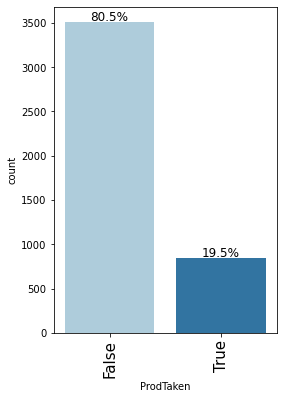

In [26]:
labeled_barplot(df, "ProdTaken", perc=True)

- Most customers did not purchase a package (80.5%)

### Observations on Age

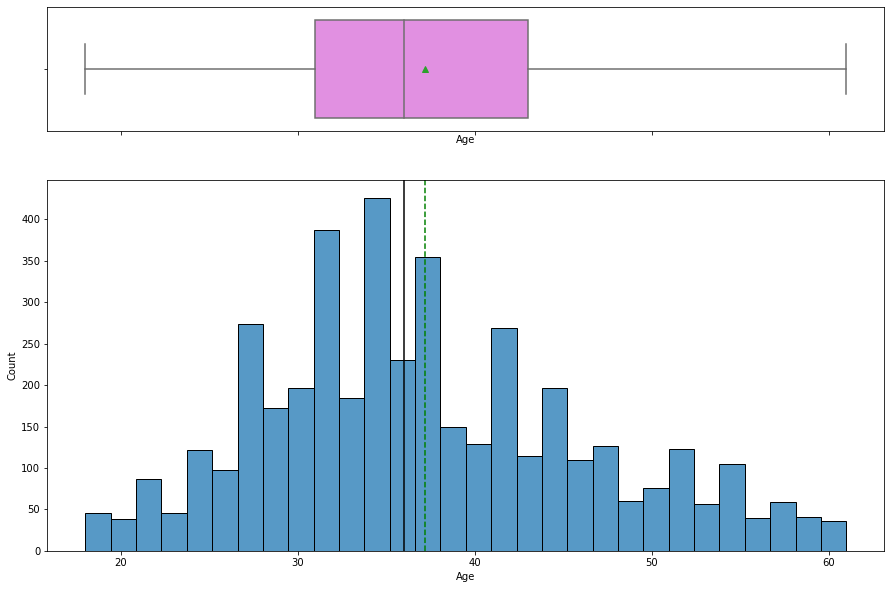

In [27]:
histogram_boxplot(df,"Age")

- the distribution of Age is slightly right skewed
- there are no outliers in this variable
- We can see the third quartile is 43 which means 75% of customers have an Age under 43

### Observations on TypeofContact

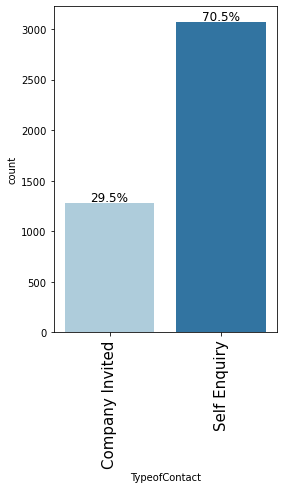

In [28]:
labeled_barplot(df, "TypeofContact", perc=True)

- Majority of Customers came through Self Enquiry(70.5%)

### Observations on CityTier

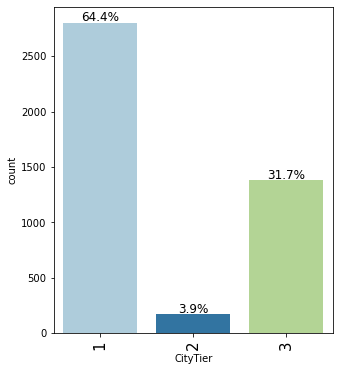

In [29]:
labeled_barplot(df, "CityTier", perc=True)

- Most cities fall under the tier 1 category (64.4%)
- The second highest group of cities are tier 2 (31.7%) and finally the smallest group cities are in tier 3 (3.9%)

### Observations on DurationOfPitch

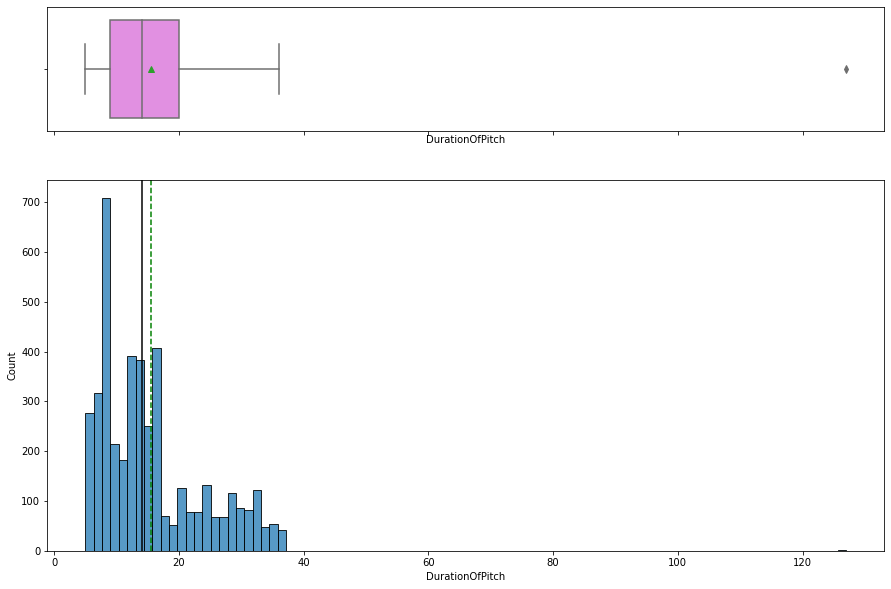

In [30]:
histogram_boxplot(df,"DurationOfPitch")

- the distribution of DurationOfPitch is right skewed
- there are very few outliers but at a very high value
- We can see the third quartile is 20 which means 75% of customers had a pitch of 20 minutes

### Observations on Occupation

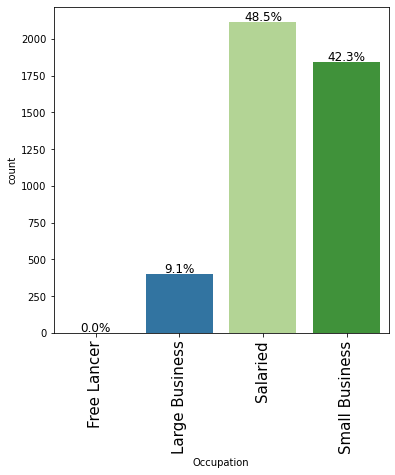

In [31]:
labeled_barplot(df, "Occupation", perc=True)

- Most customers are salaried (48.5%)
- The second largest group of customers are employed by a small business (42.3%) 
- The third largest category of customers are emplyed by a large business (9.1%)
- The smallest group of customers is almost nonexistent, they are Free lancers(approx <0.1%)

### Observations on Gender

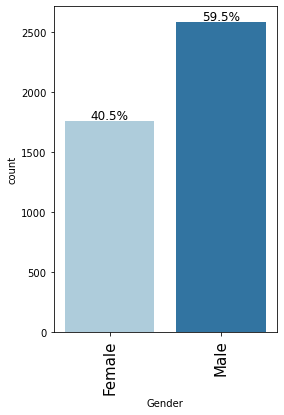

In [32]:
labeled_barplot(df, "Gender", perc=True)

- Most customers are Male (59.5%)

### Observations on NumberOfPersonVisiting

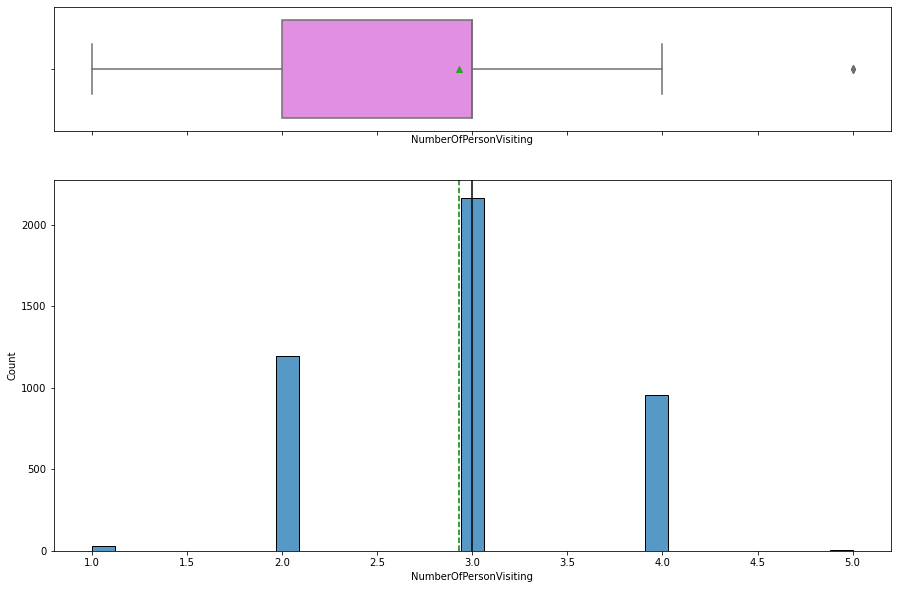

In [33]:
histogram_boxplot(df,"NumberOfPersonVisiting")

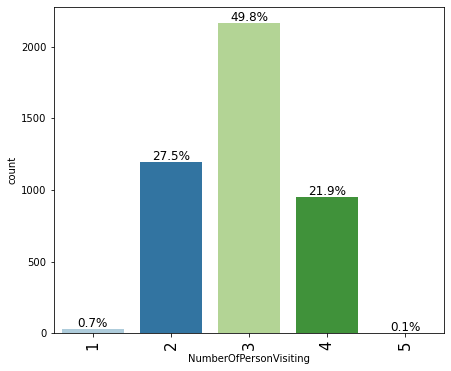

In [34]:
labeled_barplot(df, "NumberOfPersonVisiting", perc=True)

- Variable is in discrete numbers because it is representative of number of people
- The NumberOfPersonVisiting distribution is left skewed. 
- Small percentage of outliers
- Most customers travel with 3 people (49.8%) followed by 2 people (27.5%) and 4 people(21.9%) and 1 person (0.7%)
- Least amount of customers travel with 5 people(0.1%)

### Observations on NumberOfFollowups

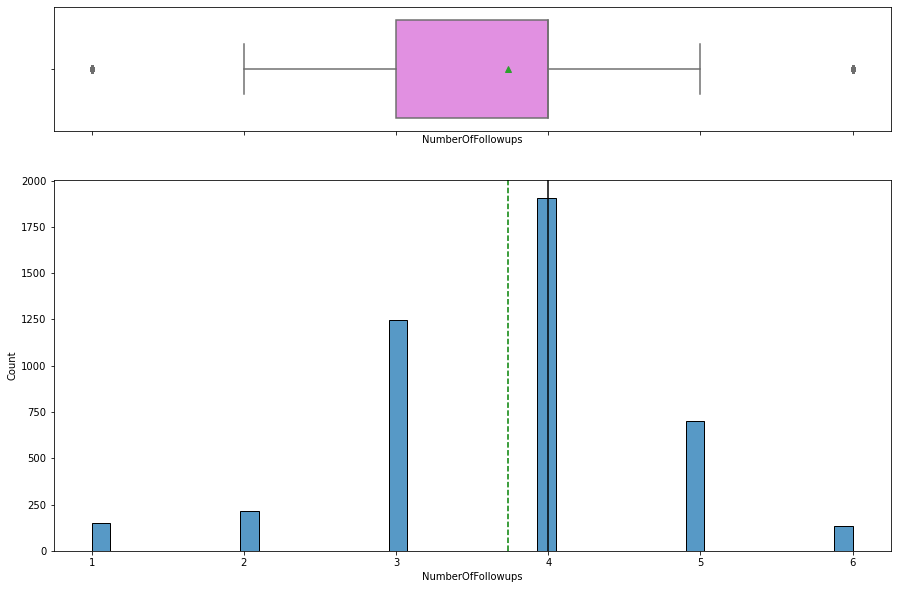

In [35]:
histogram_boxplot(df,"NumberOfFollowups")

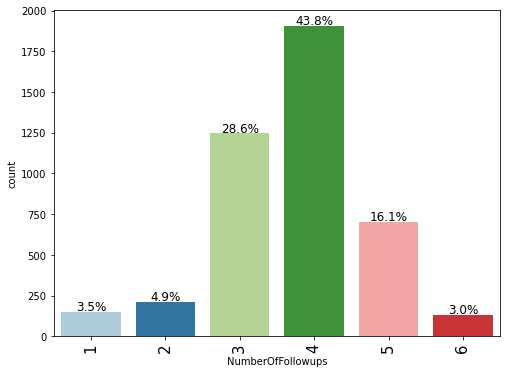

In [36]:
labeled_barplot(df, "NumberOfFollowups", perc=True)

- Variable is in discrete numbers because it is representative of number of followups.
- The NumberOfFollowups distribution is left skewed. 
- Small percentage of outliers, customers with 1 follow up and 6 follow ups.
- Most customers get 4 followups (43.8%) followed by 3 followups (28.6%), 5 followups (16.1%) and 2 followups (4.9%)
- Least amount of customers have 6 follow ups(3.0%)

### Observations on ProductPitched

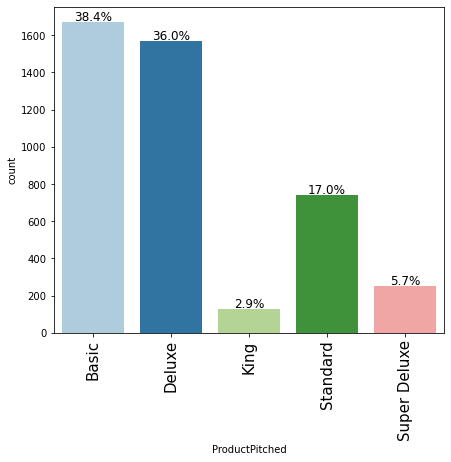

In [37]:
labeled_barplot(df, "ProductPitched", perc=True)

- Most customers are pitched on the basic product (38.4%) closely followed by the deluxe product (36.0%), then the standard product (17.0) and the super deluxe product (5.7%).
- Least amount of customers are pitched the King product (2.9%)

### Observations on PreferredPropertyStar

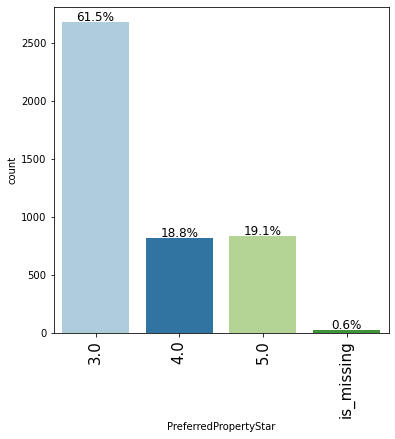

In [38]:
labeled_barplot(df, "PreferredPropertyStar", perc=True)

- Most customers perfer a 3 star property (61.5%) followed by 5 star (19.1%) and 4 people(18.8%)
- Least amount of customers have no value/preferrence (0.6%)

### Observations on MaritalStatus

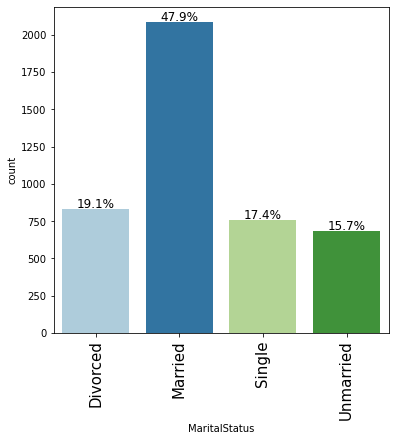

In [39]:
labeled_barplot(df, "MaritalStatus", perc=True)

- Most customers are married (47.9%) followed by divorced (19.1%) and single (17.4%).
- Least amount of customers are unmarried (15.7%)

### Observations on NumberOfTrips

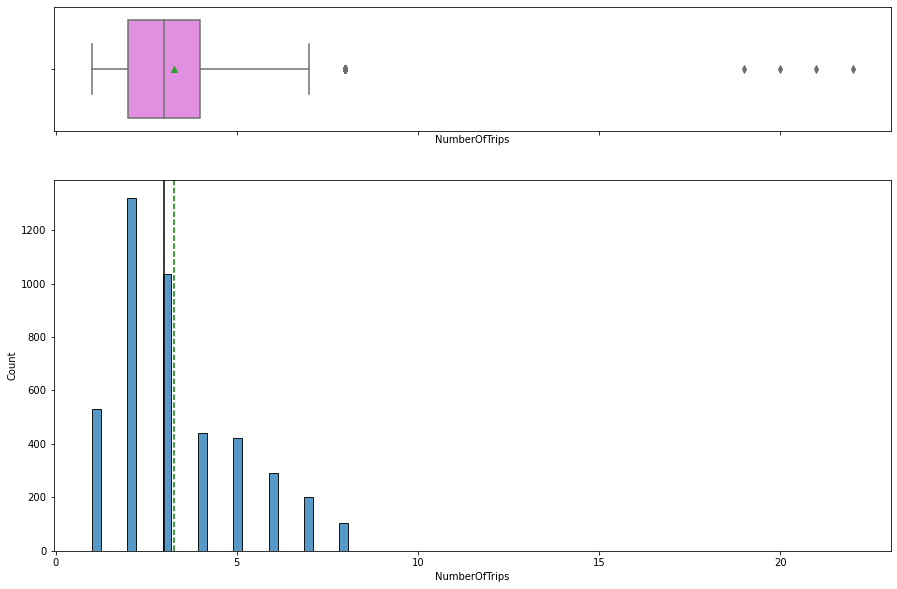

In [40]:
histogram_boxplot(df,"NumberOfTrips")

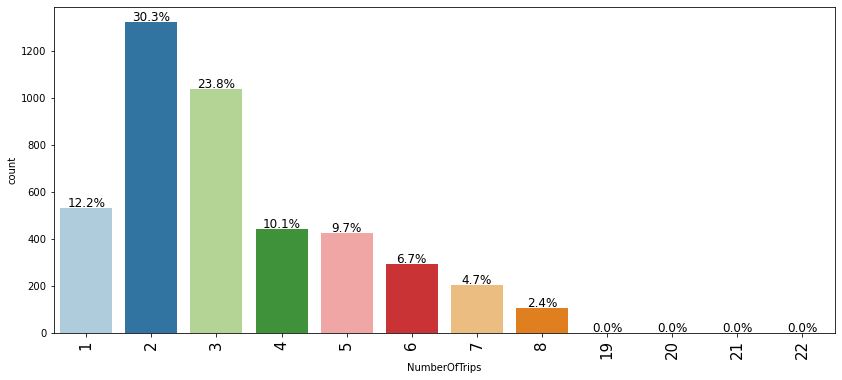

In [41]:
labeled_barplot(df, "NumberOfTrips", perc=True)

- Variable is in discrete numbers because it is representative of number of trips.
- The NumberOfTrips distribution is slightly right skewed. 
- Small percentage of outliers starting from 8+ trips
- Most customers go on 2 trips (30.3%) followed by 3 trips (23.8%), 1 trip (12.2%), 4 trips (10.1%), and 5 trips (9.7%)
- Least amount of customers go on  8-22 trips follow ups (2.4%)

### Observations on Passport

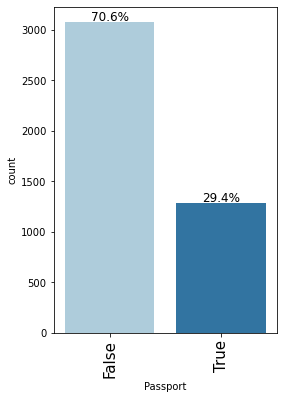

In [42]:
labeled_barplot(df, "Passport", perc=True)

- Most customers do not have a passport (70.6%)

### Observations on PitchSatisfactionScore

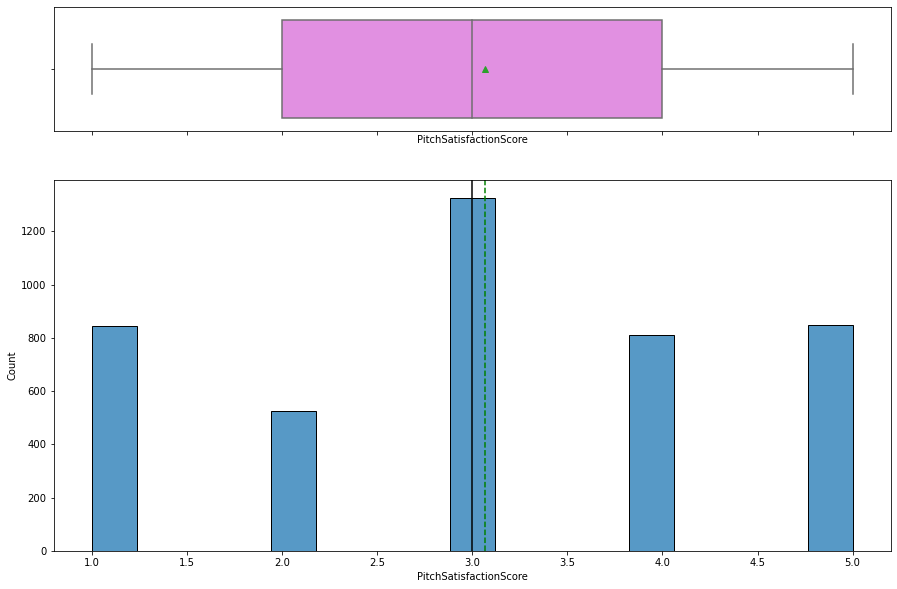

In [43]:
histogram_boxplot(df,"PitchSatisfactionScore")

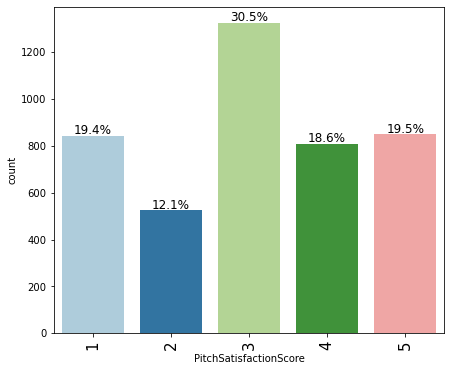

In [44]:
labeled_barplot(df, "PitchSatisfactionScore", perc=True)

- Variable is in discrete numbers because it is representative of satisfaction score.
- The NumberOfTrips distribution is slightly left skewed. 
- No Outliers
- Most customers rate their satisfaction a 3 (30.5%) followed by 5 score (19.5%), 1 score (19.4%), and 4 score (18.6%).
- Least amount of customers rate a 2 score (12.1%).

### Observations on OwnCar

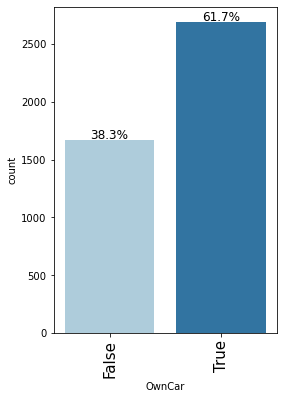

In [45]:
labeled_barplot(df, "OwnCar", perc=True)

- Most customers own a car (61.7%)

### Observations on NumberOfChildrenVisiting

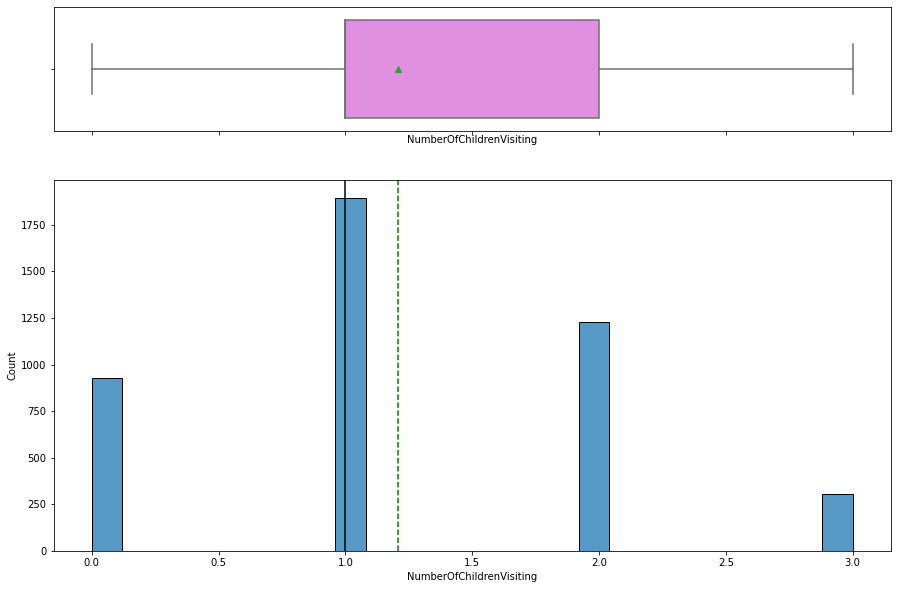

In [46]:
histogram_boxplot(df,"NumberOfChildrenVisiting")

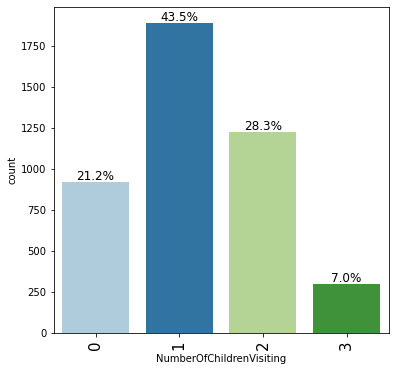

In [47]:
labeled_barplot(df, "NumberOfChildrenVisiting", perc=True)

- Variable is in discrete numbers because it is representative of number for children.
- Distribition of Number of Children visiting is right skewed
- No Outliers in this variable
- Most customers bring 1 child (43.5%) followed by 2 children (28.3%) and 1 child (21.2%).
- Least amount of customers bring 3 children (7.0%)

### Observations on Designation

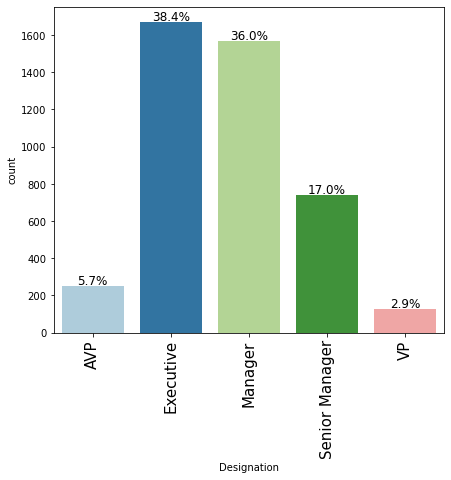

In [48]:
labeled_barplot(df, "Designation", perc=True)

- Most customers are Executives (38.4%) followed by Managers (36.0%), Senior Managers (17.0%) and AVP's (5.7%).
- Least amount of customers are VP's (2.9%)

### Observations on MonthlyIncome

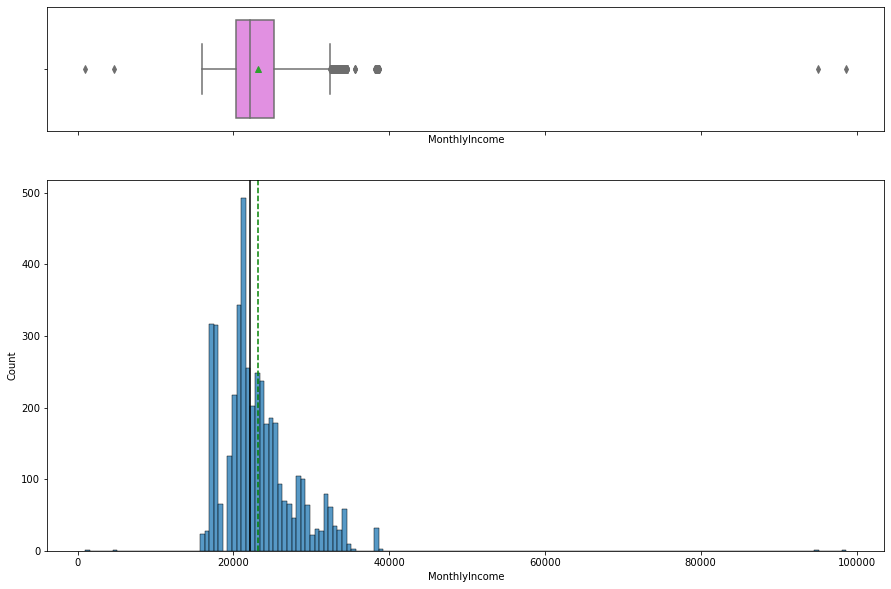

In [49]:
histogram_boxplot(df,"MonthlyIncome")

- the distribution of MonthlyIncome is right skewed.
- there are many outliers in this variable.
- We can see the third quartile is 25221 which means 75% of customers have make under 25221 dollars.

## Bivariate Analysis

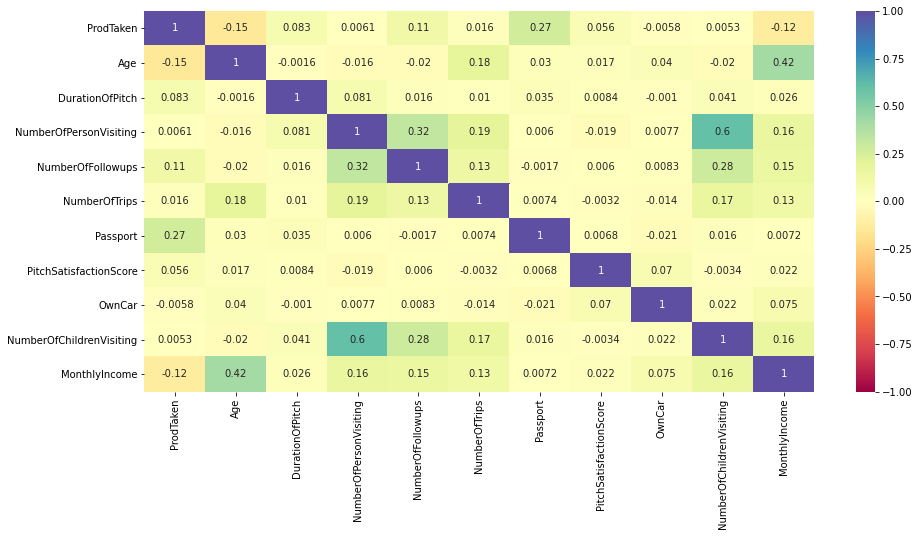

In [50]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

- Highest correlation between NumberOfPersonVisiting and NumberOfChildrenVisiting.
- MonthlyIncome moderately positively correlated with Age and less but still positively correlated with NumberOfPersonVisiting, NumberOfFollowups, NumberOfTrips and NumberOfChildren
- ProductTaken moderately positively correlated with Passport and less but still positivelu corellated with NumberOfFollowups
- NumberOfFollowups postiviely correlated with NumberOfPersonVisiting and less but still positively corellated with Number ofTrips and ProdTaken

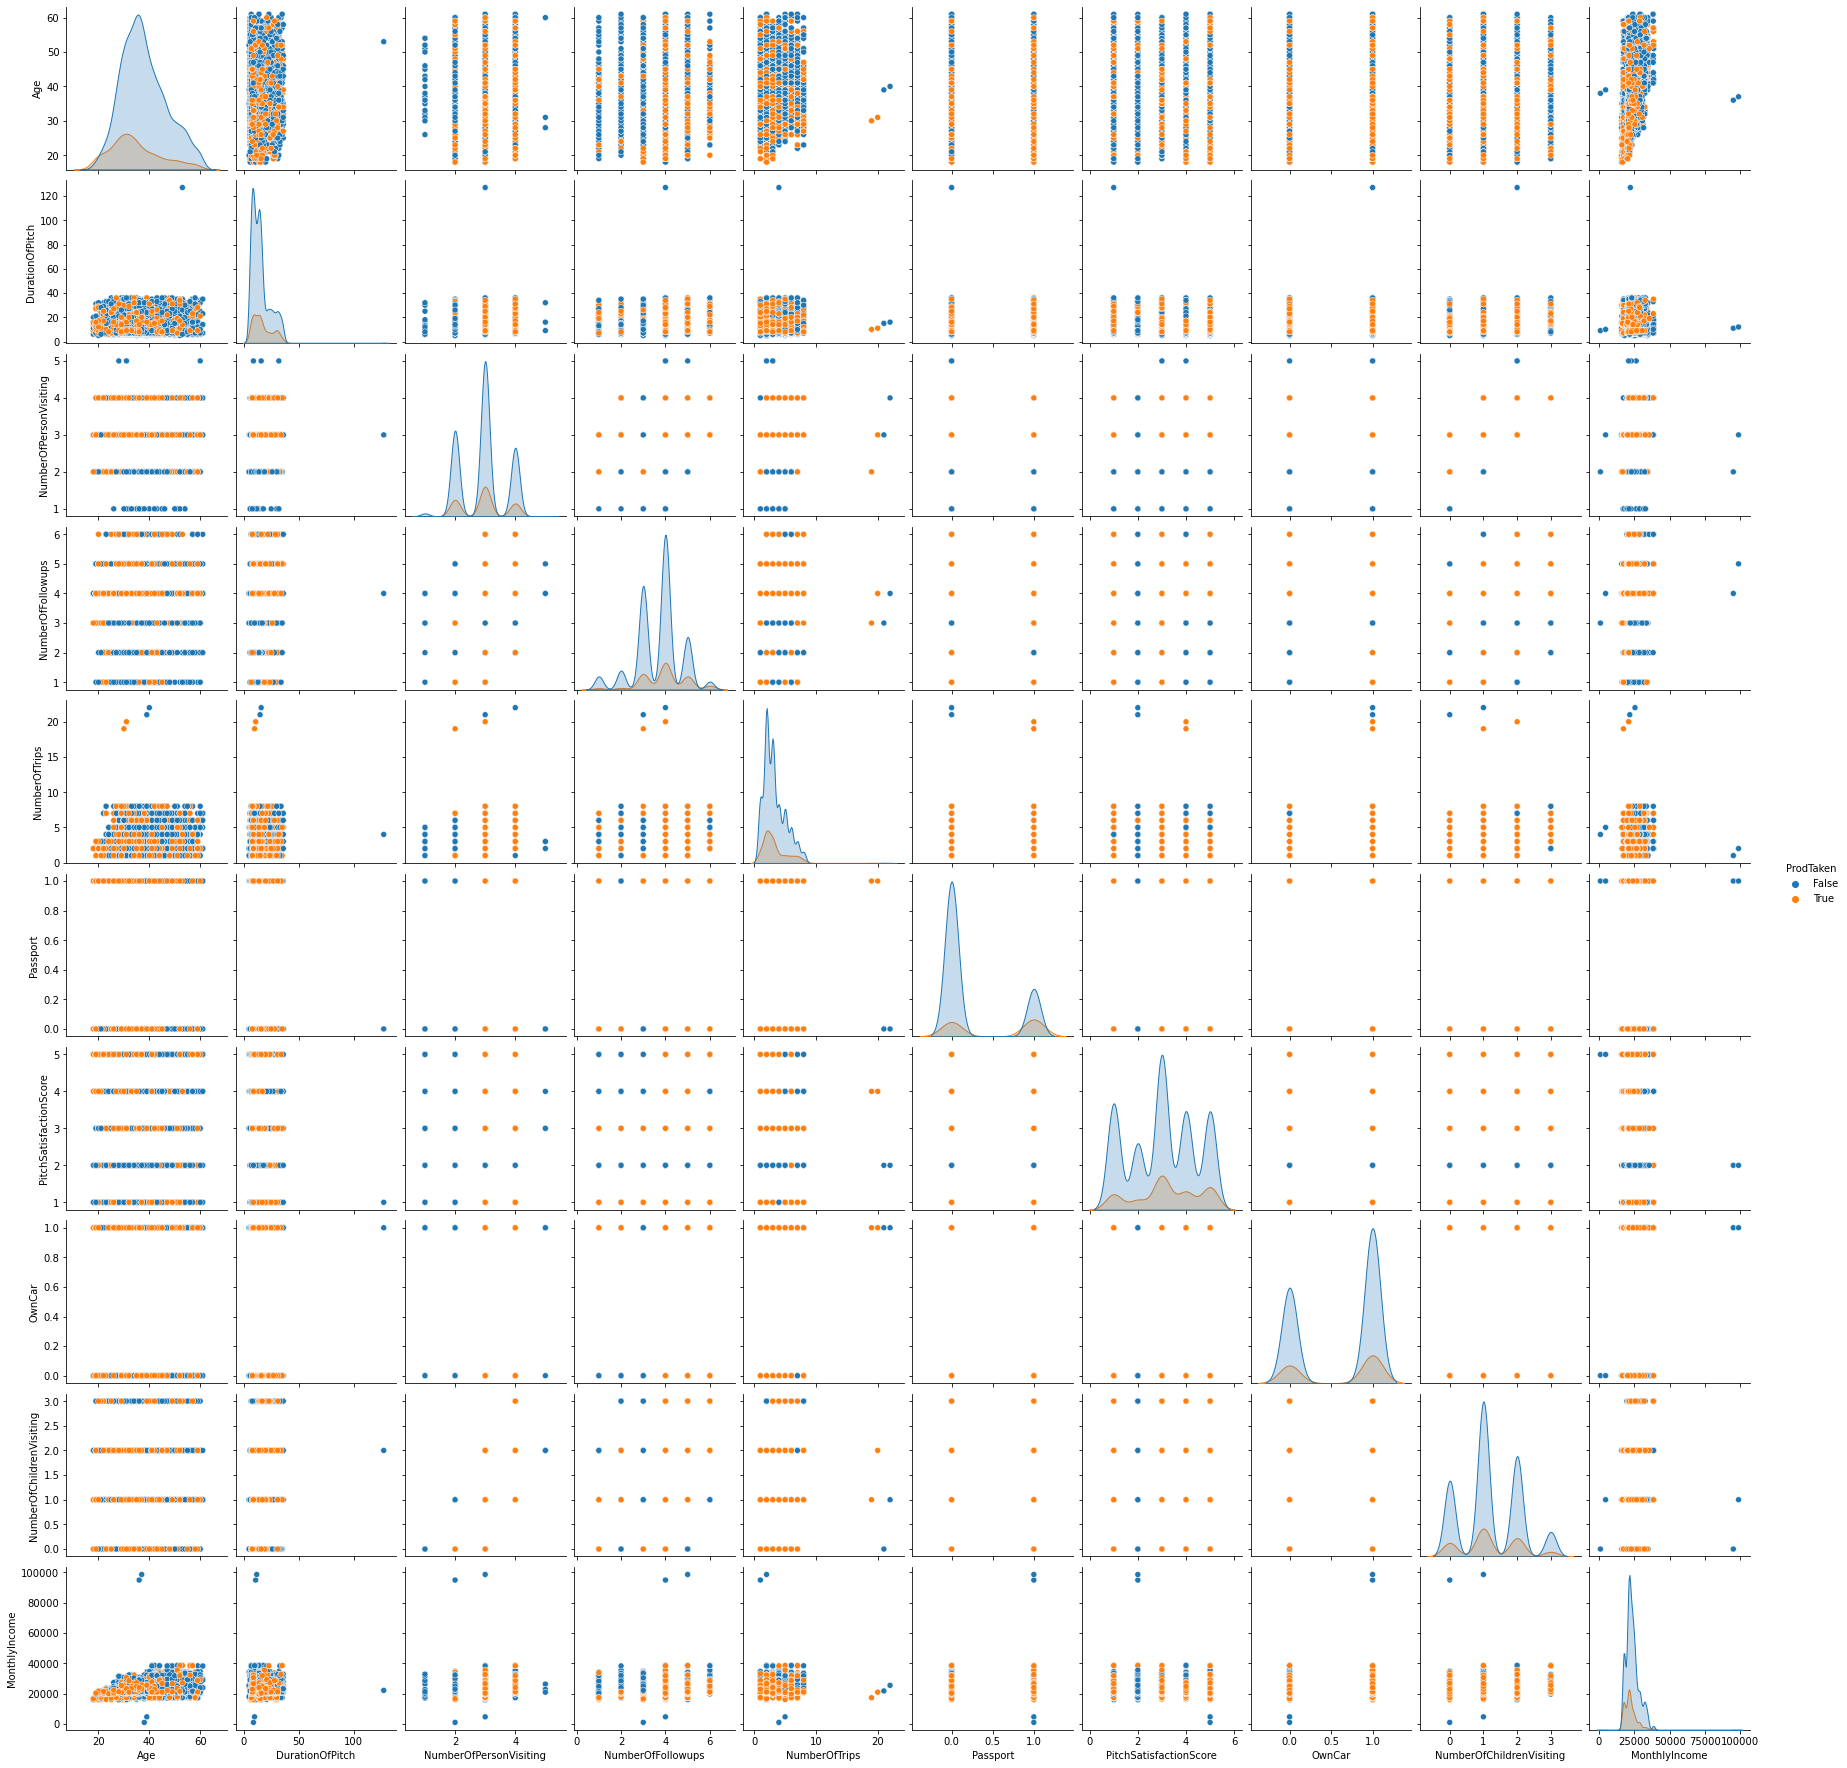

In [51]:
sns.pairplot(data=df, hue="ProdTaken")
plt.show()

In [52]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

ProdTaken        False  True   All
TypeofContact                     
All               3506   847  4353
Self Enquiry      2515   556  3071
Company Invited    991   291  1282
------------------------------------------------------------------------------------------------------------------------


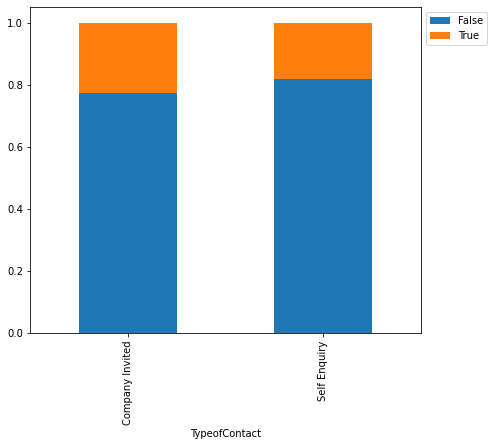

In [53]:
stacked_barplot(df,"TypeofContact","ProdTaken")

- Higher number of customers that self-inquired bought the package
- Higher percentage of Company invited customers bought the package

ProdTaken  False  True   All
CityTier                    
All         3506   847  4353
1           2334   468  2802
3           1045   335  1380
2            127    44   171
------------------------------------------------------------------------------------------------------------------------


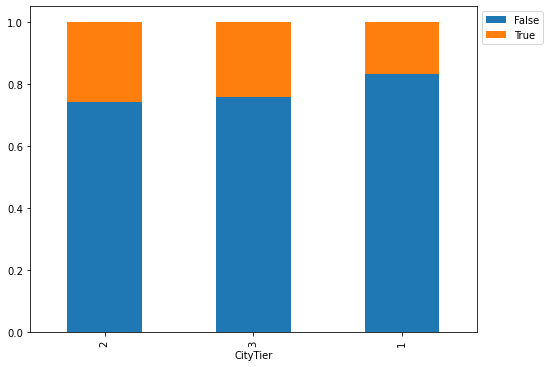

In [54]:
stacked_barplot(df,"CityTier","ProdTaken")

- Highest number of customers that bought the package were for Tier 1 cities
- Highest percentage of customers that bought the package were for tier 2 cities but it is also the lowest total customers by a large margin
- Tier 3 cities had very similar percentages to tier 2 with 8x the number of total customers

ProdTaken       False  True   All
Occupation                       
All              3506   847  4353
Salaried         1728   384  2112
Small Business   1492   349  1841
Large Business    286   112   398
Free Lancer         0     2     2
------------------------------------------------------------------------------------------------------------------------


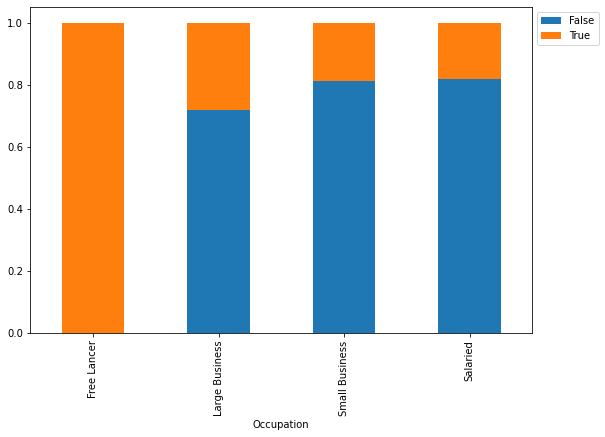

In [55]:
stacked_barplot(df,"Occupation","ProdTaken")

- While freelance customers have the highest percentage of buying the package, they are also a group with no data, recommend getting more data on this group, potentially will be removed as to not skew data
- Ignoring freelance the next highest percentage is from  customers employed by a large business, approx 28% bought the package
- Customers employed by small business' and salaried share similar percentages of buying the package (~18%)

ProdTaken  False  True   All
Gender                      
All         3506   847  4353
Male        2059   529  2588
Female      1447   318  1765
------------------------------------------------------------------------------------------------------------------------


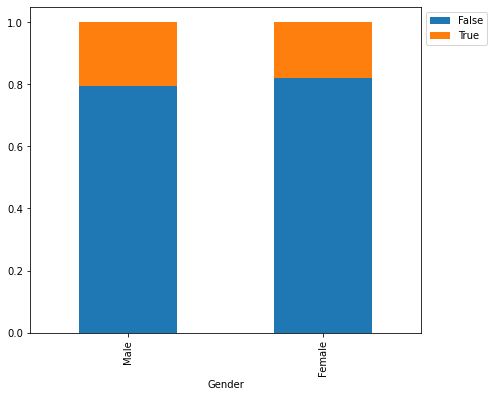

In [56]:
stacked_barplot(df,"Gender","ProdTaken")

- Male customers both have higher number and higher percentage in buying the package when compared to Females

ProdTaken       False  True   All
ProductPitched                   
All              3506   847  4353
Basic            1166   504  1670
Deluxe           1377   190  1567
Standard          618   121   739
Super Deluxe      231    19   250
King              114    13   127
------------------------------------------------------------------------------------------------------------------------


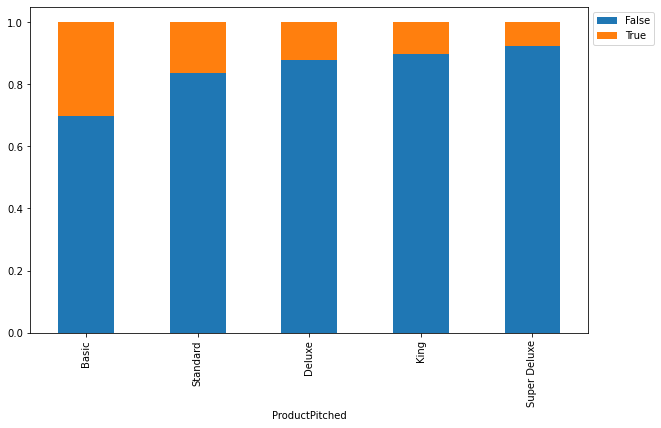

In [57]:
stacked_barplot(df,"ProductPitched","ProdTaken")

- Customers pitched the basic package have both the highest number and highest percentage of the package bought
- Standard has next highest percentage of packages bought after basic
- Deluxe has next highest amount of packages bought after basic

ProdTaken              False  True   All
PreferredPropertyStar                   
All                     3506   847  4353
3.0                     2226   449  2675
5.0                      610   222   832
4.0                      650   170   820
is_missing                20     6    26
------------------------------------------------------------------------------------------------------------------------


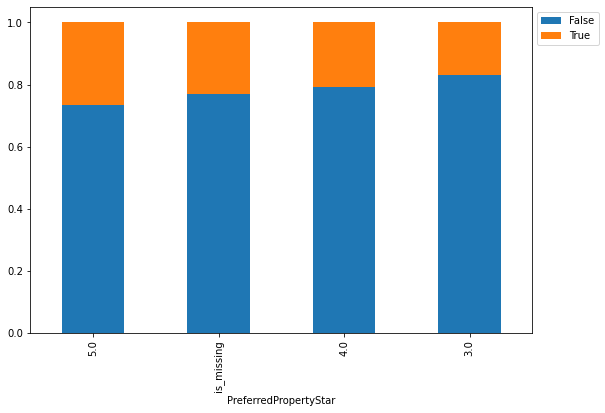

In [58]:
stacked_barplot(df,"PreferredPropertyStar","ProdTaken")

- while is_missing has a high percentage it has few numbers, might be worth removing.
- Customers who preferred a 5.0 star property had the highest percentage of customers that bought the package
- Customers who preferred a 3.0 star propery had the highest number of customers that bought the package

ProdTaken      False  True   All
MaritalStatus                   
All             3506   847  4353
Married         1784   299  2083
Single           490   268   758
Unmarried        516   166   682
Divorced         716   114   830
------------------------------------------------------------------------------------------------------------------------


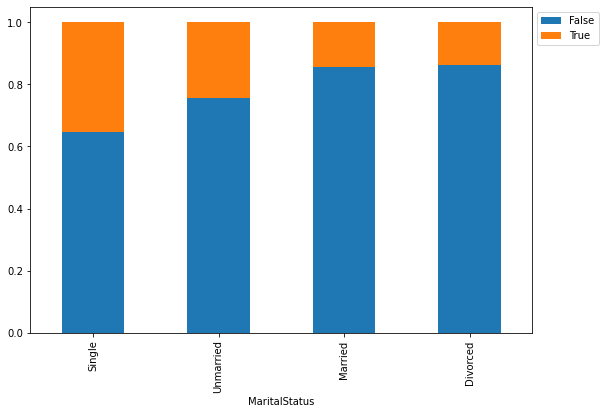

In [59]:
stacked_barplot(df,"MaritalStatus","ProdTaken")

- Highest percentage of customers that bought the package were single.
- Highest number of customers that bough the package were married.

ProdTaken  False  True   All
Passport                    
All         3506   847  4353
True         823   458  1281
False       2683   389  3072
------------------------------------------------------------------------------------------------------------------------


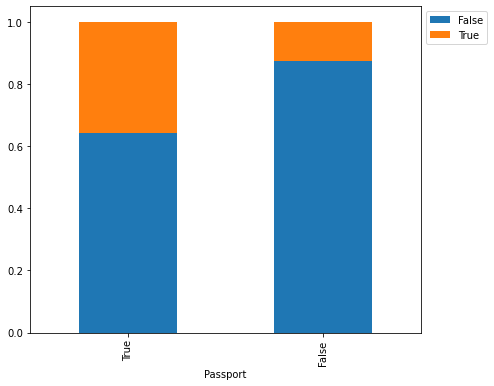

In [60]:
stacked_barplot(df,"Passport","ProdTaken")

- Highest number and percentage of customers that bought the package had a passport

ProdTaken  False  True   All
OwnCar                      
All         3506   847  4353
True        2169   518  2687
False       1337   329  1666
------------------------------------------------------------------------------------------------------------------------


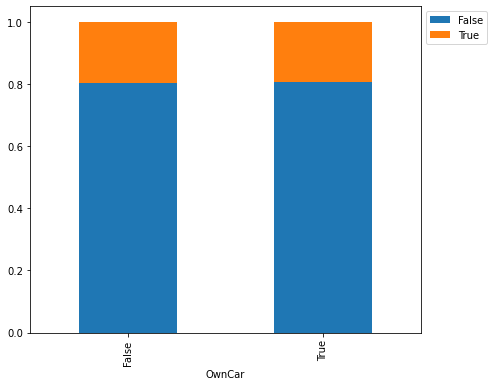

In [61]:
stacked_barplot(df,"OwnCar","ProdTaken")

- Similar percentages of customers that bought the package between those that own a car and do not own a car.
- Highest number of customers that bought the package own a car

ProdTaken       False  True   All
Designation                      
All              3506   847  4353
Executive        1166   504  1670
Manager          1377   190  1567
Senior Manager    618   121   739
AVP               231    19   250
VP                114    13   127
------------------------------------------------------------------------------------------------------------------------


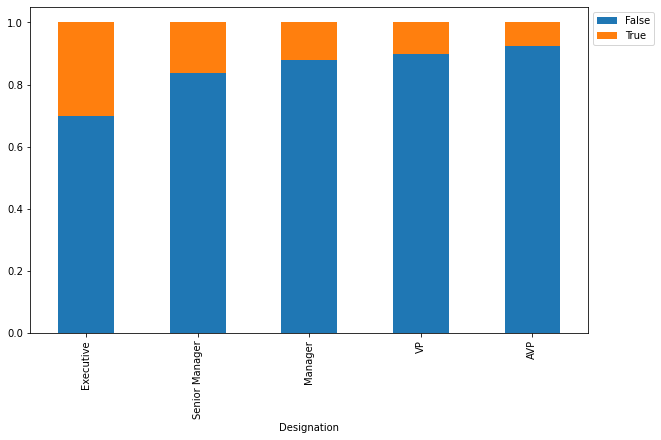

In [62]:
stacked_barplot(df,"Designation","ProdTaken")

- Highest number and percentage of customers that bought the package hold an executive position.
- 2nd highest percentage of customers that bought the package are senior managers
- 2nd highest number of customers that bought the package are Managers

### ProdTaken vs Age, DurationOfPitch, NumberOfPersonVisiting, NumberOfFollowups, PitchSatsifactionScore, NumberOfChildrenVisiting and Monthly Income

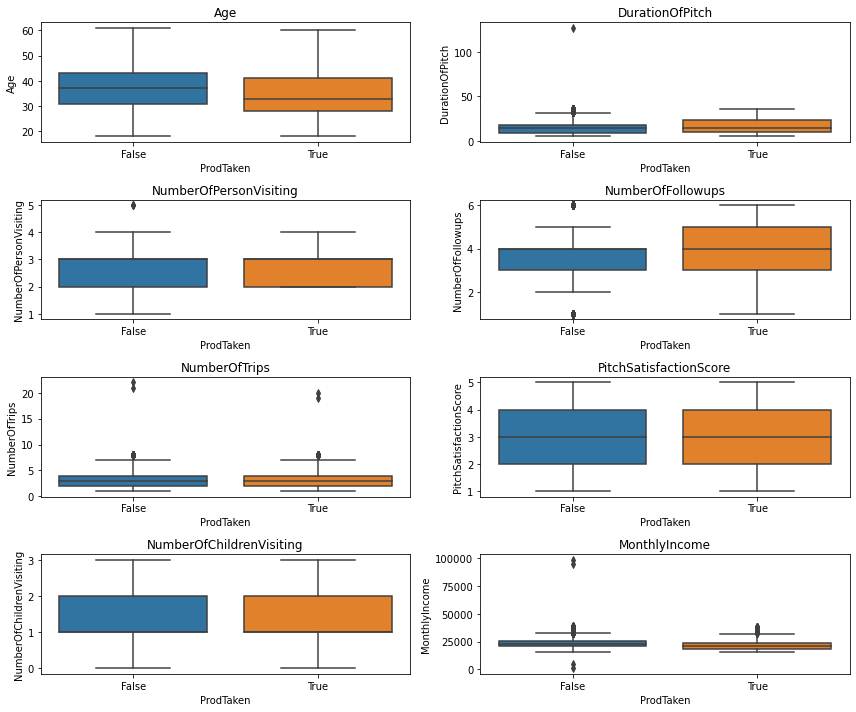

In [63]:
cols = df[
    [
        "Age",
        "DurationOfPitch",
        "NumberOfPersonVisiting",
        "NumberOfFollowups",
        "NumberOfTrips",
        "PitchSatisfactionScore",
        "NumberOfChildrenVisiting",
        "MonthlyIncome"
    ]
].columns.tolist()
plt.figure(figsize=(12, 10))

for i, variable in enumerate(cols):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(df["ProdTaken"], df[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

- Mean Age of customers who bought the package is lower (approx 33 years old) than those who did not buy it (approx 37 years)
    * Both groups share the same range of 18 to 61
    * There are no outliers in either group
- Mean of DurationOfPitch similar between customers who bought the package and who did not
    * Slightly higher range of duration for customers who bought the package
    * No outliers in duration for customers that bought the package, many outliers for those that did not
- Mean NumberOfPerson visiting similar between customers who bought the package and who did not
    * Those who bought the package highly right skewed, did not bring less than 2 people
    * Similar upper range between both groups
    * Outliers only in those who did not buy the package.
- Mean NumberOfFollowups is higher for customers that bought the package
    * Range of follow ups is larger on upper and smaller on the lower end for customers that bought the package
    * No outliers in customers that bought the package, outliers in follow ups for customers that didnt
- NumberOfTrips share same distribution, range and mean across both customers who did and did not buy the package
    * Varying outliers among both groups
- PitchSatisfactionScore share same distribution, range and mean across both customers who did and did not buy the package
    * No Outliers in either Group
- NumberOfChildrenVisiting share same distribution, range and mean across both customers who did and did not buy the package
    * No Outliers in either Group
- Range, mean and general distribution of MonthlyIncome is lower for those that bought the package.
    * Outliers in both groups, more outliers on the lower and upper end for those who did not buy the package

### Summary of EDA
**Data Description**

- There are no duplicate values in the dataset
- There were many missing data entries.
- Dependent variable is ProdTaken which is bool data type
- Most data types are **int64** or **category**

**Data Cleaning:**

CustomerID is an ID variable and not useful for predictive modelling
In order to properly compute and analyse the data they went through missing value treatment.
    *

**Observations from EDA**
* `ProdTaken`: 80.5% Of customers did not purchase a package.
    * Moderate postive correlation with passport
    * Positive correlation with NumberOfFollowups
    
* `Age`: There are no outliers in this variable, mean age is 37 and it has a wide range of 18 to 61 years. The third quartile is 43 which means 75% of customers have an Age under 43
    * Positively correlated with NumberOfTrips
    * Negatively correlated with ProdTaken
    
* `TypeofContact`: 70.5% of customers Self Enquired about packages

* `CityTier`:  64.4% of cities fall under the Tier 1 category

* `DurationOfPitch`: There are a feew outliers, the mean duration of pitch is 15 minutes. The outliers create a large range from 5 minutes to 127 minutes. The third quartile is 20 which means 75% of customers had a pitch of 20 minutes or less.
    * Weak correlations with all variables
    
* `Occupation`: Most customers are salaried (48.5%) closely followed by employees of small businesses(42.3%)

* `Gender`: 59.5% of customers are male

* `NumberOfPersonVisiting`: left skewed with few outliers on the higher end, most customers travel with 3 people (49.5%). Mean and Q3 are the same. So 75% of customers rated 3 stars or less.
    * Highly correlated with NumberOfChildrenVisiting
    * Postive correlation with monthly income
    
* `NumberOfFollowups`: Outliers on the lower and upper end, left skewed. Most customers get 4 follow ups (43.8%).  Mean and Q3 are the same. So 75% of customers had 4 follow ups or less
    * Moderate postive correlation with NumberOfPersonVisiting
    * Postive correlation with monthly income
    
* `ProductPitched`: Most customers are pitched on the basic product (38,4%) followed closely by the deluxe product (36.0%)

* `PreferredPropertyStar`: Most customers prefer a 3 star property (61.5%)

* `MaritalStatus`:  47.9% of customers are Married

* `NumberOfTrips`: Slightly right skewed, most customers go on 2 trips (30.3%).The third quartile is 4 trips which means 75% of customers have had 4 trips or less.  
    * Positively correlated with NumberOfPersonVisiting
    * Positive correlation with NumberOfFollowups
    
* `Passport`: Most customers do not have a passport
    * Weak correlations with all other variables except ProdTaken
    
* `PitchSatisfactionScore`: Most customers rate their satisfaction at a 3 (30.5%). The third quartile is a score of 4 which means 75% of customers have rated their satisfaction a 4 or less.
    * Weak correlations with all variables
* `OwnCar`: Most customers own a car (61.7%)
    * Weak correlations with all variables
    
* `NumberOfChildrenVisiting`: Distribution lightly left skewed with no outliers, most customers bring 1 child (43.5%). The third quartile is 2 which means 75% of customers bring 2 children less. 
    * Moderate postive correlation with NumberOfFollowups
    * Positive correlation with NumberOfTrips
    
* `Designation`: Most customers are Executives (38.4%) followed by Managers (36.0%)

* `MonthlyIncome`: Has many outliers and is left skewed. The third quartile is 25221 which means 75% of customers have make under 25221 dollars.
    * Moderately postively correlated with Age
    * Negatively correlated with ProdTaken

* `ProdTaken vs Other Variables
    * Customers that are company invited tend to buy the package.
    * Customers going to Tier 2 cities tend to buy the package the most, however the lack of data makes the estimation lean more towards Tier 3 cities.
    * While Freelancers have a 100% rate of buying the package, their lack of data makes it skewed. The customers that tend to buy the package are employed by Large Business'
    * Male customers tend to buy the package
    * Customers pitched the basic package tend to buy the package.
    * Customers who preferred 5 star properties tend to buy the package.
    * Customers that are single tend to buy the package
    * Customers that have a passport tend to buy the packaget
    * While the highest number of customers that bought he package owned a car there were nearly the same tendency to buy a package between both groups.
    * Customers with an executive position tend to buy the package 
    * Mean Age of customers that bought the package (approx 34 years old) is lower that customers that did not buy the package (approx 37).
    * Slightly higher range of DurationOfPitch for customers that bought the package, similar means for both groups (approx 15 min).
    * Mean NumberOfPersonVisiting similar between those who bought the package (approx 2.8) and who did not.
        * Same Q1 and Q2 for those who bough the package, upper quartile range is similar for both groups.
    * Mean NumberOfFollowups is slightly higher for customers that bought the package (approx 3.9) than customers who did not (approx 3.7)
        * Upper quartile range is higher among customers that bought the package.
    * NumberofTrips, PitchSatisfactionScore and NumberOfChildrenVisiting share same distribution, range and mean across both customers who did and did not buy the package.
    * Range, mean and general distribution of MonthlyIncome is lower for those that bought the package.

### Customer Profile - Majority Characteristics of entire customer base

This is a profile of all the characteristics that make up the what the majority/average of customers, as well as interactions with the average customer.
**Customer details:**
* `ProdTaken`: No package bought
* `Age`: 37 years old
* `TypeofContact`: Self Enquired
* `CityTier`:  1
* `Occupation`: Salaried
* `Gender`:  Male
* `NumberOfPersonVisiting`: 3 people visiting
* `PreferredPropertyStar`: 3 stars
* `MaritalStatus`: Married
* `NumberOfTrips`: 2 trips  
* `Passport`: No passport
* `OwnCar`: Owns a car
* `NumberOfChildrenVisiting`:  1 child visiting
* `Designation`: Executive
* `MonthlyIncome`: 25221

**Customer interaction data:** 
* `DurationOfPitch`: 15 minutes
* `PitchSatisfactionScore`: Satisfaction score of 3
* `NumberOfFollowups`: 4 follow ups
* `ProductPitched`: Basic product

## Data Pre-processing

### Feature Engineering

- we have already done missing value treatment. The following columns have outliers based on their histogram:
    * DurationOfPitch
    * NumberOfPersonVisiting
    * NumberOfFollowups
    * NumberOfTrips
    * MonthlyIncome

#### Finding Outliers

In [64]:
def IQR_detect(data, colname):
    quartiles = np.quantile(data[colname][data[colname].notnull()], [.25, .75])
    colname_4iqr = 4 * (quartiles[1] - quartiles[0])
    print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {colname_4iqr}')
    colname_outliers = df.loc[np.abs(data[colname] - data[colname].median()) > colname_4iqr, colname]
    return colname_outliers

In [65]:
MontlyIncome_outliers = IQR_detect(df,'MonthlyIncome')
MontlyIncome_outliers

Q1 = 20396.0, Q3 = 25221.0, 4*IQR = 19300.0


38      95000.0
142      1000.0
2482    98678.0
Name: MonthlyIncome, dtype: float64

We will be dropping the outliers for MonthlyIncome because their extremely low and very high values skews the distribution of the data.

In [66]:
df.drop(MontlyIncome_outliers.index, axis=0, inplace=True)

In [67]:
DurationOfPitch_outliers = IQR_detect(df,'DurationOfPitch')
DurationOfPitch_outliers

Q1 = 9.0, Q3 = 20.0, 4*IQR = 44.0


3878    127.0
Name: DurationOfPitch, dtype: float64

Single extremely high value skews the data.

In [68]:
df.drop(DurationOfPitch_outliers.index, axis=0, inplace=True)

In [69]:
NumberOfPersonVisiting_outliers = IQR_detect(df,'NumberOfPersonVisiting')
NumberOfPersonVisiting_outliers

Q1 = 2.0, Q3 = 3.0, 4*IQR = 4.0


Series([], Name: NumberOfPersonVisiting, dtype: int64)

Outliers not detected, not so far outside the realm of possibility to require change

In [70]:
NumberOfFollowups_outliers = IQR_detect(df,'NumberOfFollowups')
NumberOfFollowups_outliers

Q1 = 3.0, Q3 = 4.0, 4*IQR = 4.0


Series([], Name: NumberOfFollowups, dtype: int64)

Outliers not detected, not so far outside the realm of possibility to require change

In [71]:
NumberOfTrips_outliers = IQR_detect(df,'NumberOfTrips')
NumberOfTrips_outliers

Q1 = 2.0, Q3 = 4.0, 4*IQR = 8.0


385     19
816     21
2829    20
3260    22
Name: NumberOfTrips, dtype: int64

Extremely high values skew the data.

In [72]:
df.drop(NumberOfTrips_outliers.index, axis=0, inplace=True)

## Model Building

### Split the Data

In [73]:
X = df.drop(['ProdTaken'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df['ProdTaken']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.head()

Age  DurationOfPitch  NumberOfPersonVisiting  NumberOfFollowups  \
3227   42             14.0                       3                  2   
1333   46             16.0                       3                  3   
2704   33             14.0                       4                  3   
4106   36             30.0                       3                  5   
625    45             15.0                       3                  3   

      NumberOfTrips  Passport  PitchSatisfactionScore  OwnCar  \
3227              3     False                       3    True   
1333              6     False                       1   False   
2704              3     False                       2   False   
4106              5      True                       4    True   
625               5      True                       2    True   

      NumberOfChildrenVisiting  MonthlyIncome  ...  PreferredPropertyStar_4.0  \
3227                         2        22054.0  ...                          0   
1333                         2        22314.0  ...                          1   
2704                         2        21472.0  ...                          1   
4106                         1        24594.0  ...                          0   
625                          0        25761.0  ...                          0   

      PreferredPropertyStar_5.0  PreferredPropertyStar_is_missing  \
3227                          0                                 0   
1333                          0                                 0   
2704                          0                                 0   
4106                          0                                 0   
625                           1                                 0   

      MaritalStatus_Married  MaritalStatus_Single  MaritalStatus_Unmarried  \
3227                      0                     0                        0   
1333                      1                     0                        0   
2704                      0                     0                        0   
4106                      1                     0                        0   
625                       1                     0                        0   

      Designation_Executive  Designation_Manager  Designation_Senior Manager  \
3227                      1                    0                           0   
1333                      0                    0                           1   
2704                      1                    0                           0   
4106                      0                    1                           0   
625                       0                    0                           1   

      Designation_VP  
3227               0  
1333               0  
2704               0  
4106               0  
625                0  

[5 rows x 31 columns]

In [75]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3041, 31)
Shape of test set :  (1304, 31)
Percentage of classes in training set:
False    0.803025
True     0.196975
Name: ProdTaken, dtype: float64
Percentage of classes in test set:
False    0.81135
True     0.18865
Name: ProdTaken, dtype: float64


### Building Models: Decision Tree, Random Forest, Bagging

- Because the company wants us to correctly predict who will buy the package we must decrease our false positives. We do this by increasing our recall score so that will be the focus criterion of success.

In [76]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [77]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Decision Tree

In [78]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.195,1:0.805},random_state=1)

- Weighted the decision tree to give more weightage to class 1

In [79]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.195, 1: 0.805}, random_state=1)

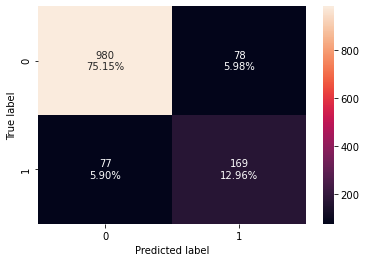

In [80]:
confusion_matrix_sklearn(dtree, X_test, y_test)

- 12.96% True positive pedicted
- 5.90% False Positive predicted
- 75.15% True Negative Predicted
- 5.98% False negative predicted

In [81]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [82]:
dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.881135  0.686992   0.684211  0.685598


**Insights:**
- Decision tree is overfitting the training data and performing poorely on the test data concerning recall and f1

#### BaggingClassifier

In [83]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

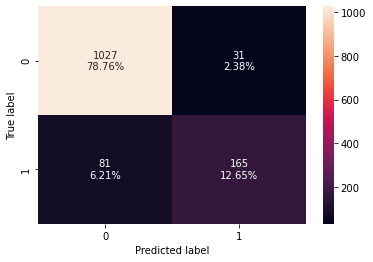

In [84]:
confusion_matrix_sklearn(bagging, X_test, y_test)

- 12.65% True positive pedicted
- 6.21% False Positive predicted
- 78.76% True Negative Predicted
- 2.38% False negative predicted

In [85]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.994081  0.978297    0.99154  0.984874


In [86]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0   0.91411  0.670732   0.841837  0.746606


**Insights:**
- Bagging classifier is overfitting on the training set. While it is performing better in accuracy, precision and f1 on the testing set compared to the Decision Tree it is doing worse in recall.

#### Weighted Bagging Classifier

In [87]:
bagging_weight = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.195,1:0.805},random_state=1),random_state=1)
bagging_weight.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.195,
                                                                      1: 0.805},
                                                        random_state=1),
                  random_state=1)

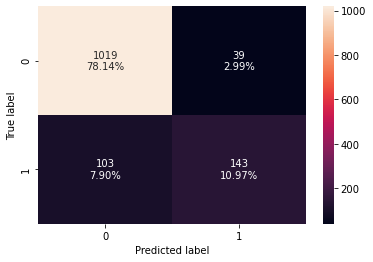

In [88]:
confusion_matrix_sklearn(bagging_weight,X_test,y_test)

- 10.97% True positive pedicted
- 7.9% False Positive predicted
- 78.14% True Negative Predicted
- 2.99% False negative predicted

In [89]:
bagging_weight_model_train_perf=model_performance_classification_sklearn(bagging_weight,X_train,y_train)
print("Training performance \n",bagging_weight_model_train_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0   0.99441  0.973289   0.998288  0.98563


In [90]:
bagging_weight_model_test_perf=model_performance_classification_sklearn(bagging_weight, X_test, y_test)
print("Testing performance \n",bagging_weight_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.891104  0.581301   0.785714  0.668224


**Insights:**
- Weighted bagging classifier is doing worst on every front compared to the non-weighted bagging classifier

#### Random Forest

In [91]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

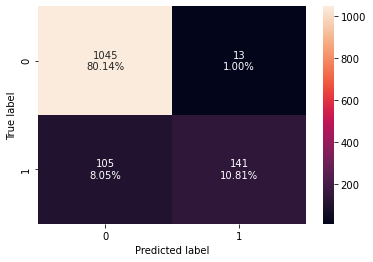

In [92]:
confusion_matrix_sklearn(rf,X_test,y_test)

- 10.81% True positive pedicted
- 8.05% False Positive predicted
- 80.14% True Negative Predicted
- 1.00% False negative predicted

In [93]:
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [94]:
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision     F1
0  0.909509  0.573171   0.915584  0.705


**Insights:**
- Doing well in accuracy and precision, not doing well in terms of recall

#### Random Forest with class weight

In [95]:
rf_weight = RandomForestClassifier(class_weight={0:0.195,1:0.805}, random_state=1)
rf_weight.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.195, 1: 0.805}, random_state=1)

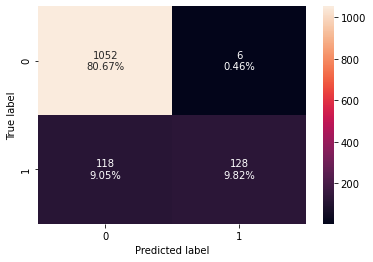

In [96]:
confusion_matrix_sklearn(rf_weight, X_test,y_test)

- 9.82% True positive pedicted
- 9.05% False Positive predicted
- 0.46% True Negative Predicted
- 80.67% False negative predicted

In [97]:
rf_weight_model_train_perf=model_performance_classification_sklearn(rf_weight, X_train,y_train)
print("Training performance \n",rf_weight_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [98]:
rf_weight_model_test_perf=model_performance_classification_sklearn(rf_weight, X_test,y_test)
print("Testing performance \n",rf_weight_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.904908  0.520325   0.955224  0.673684


**Insights:**
- Improved precision, but worse among all other criterion.

**With Default parameters:**
- Decision Tree Classifier has the highest recall score
- Bagging Classifier has the highest accuracy score
- Random Forest Classifier has the highest precision score

### Tuning Models: Decision Tree, Random Forest, Bagging

#### Tuning Decision Tree

In [99]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.195,1:0.805},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.195, 1: 0.805}, max_depth=2,
                       max_leaf_nodes=2, min_impurity_decrease=0.1,
                       random_state=1)

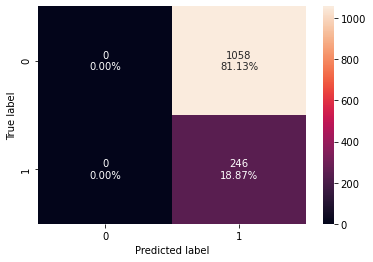

In [100]:
confusion_matrix_sklearn(dtree_estimator, X_test,y_test)

- 18.87% True positive pedicted
- 0% False Positive predicted
- 0% True Negative Predicted
- 81.13% False negative predicted

In [101]:
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, X_train,y_train)
print("Training performance \n",dtree_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision        F1
0  0.196975     1.0   0.196975  0.329121


In [102]:
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
print("Testing performance \n",dtree_estimator_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision        F1
0   0.18865     1.0    0.18865  0.317419


**Insights:**
- Overfitting in decision tree, let to perfect recall but precision and accuracy suffered greatly, which is an indication that overall the model is making many mistakes.

#### Tuning Bagging Classifier

In [103]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight={0:0.195,1:0.805},random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'recall', cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
             param_grid={'base_estimator': [DecisionTreeClassifier(class_weight={0: 0.195,
                                                                                 1: 0.805},
                                                                   random_state=1)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [5, 7, 15, 51, 101]},
             scoring='recall')

In [104]:
## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.195,
                                                                      1: 0.805},
                                                        random_state=1),
                  max_features=0.9, n_estimators=51, random_state=1)

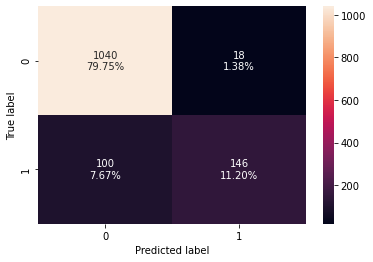

In [105]:
confusion_matrix_sklearn(bagging_estimator, X_test,y_test)

- 11.20% True positive pedicted
- 7.67% False Positive predicted
- 1.38% True Negative Predicted
- 79.75% False negative predicted

In [106]:
bagging_estimator_model_train_perf=model_performance_classification_sklearn(bagging_estimator, X_train,y_train)
print("Training performance \n",bagging_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [107]:
bagging_estimator_model_test_perf=model_performance_classification_sklearn(bagging_estimator, X_test, y_test)
print("Testing performance \n",bagging_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.909509  0.593496   0.890244  0.712195


**Insights:**
- Overfitting in training data, increase among all criterion

#### Tuning Random Forest

In [108]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [110,251,501],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
}

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_features=0.7, n_estimators=501, random_state=1)

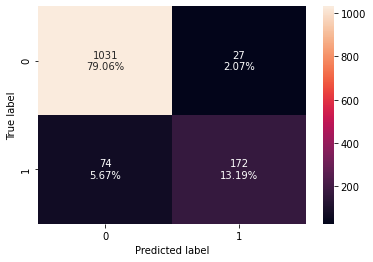

In [109]:
confusion_matrix_sklearn(rf_estimator, X_test,y_test)

- 13.19% True positive pedicted
- 5.67% False Positive predicted
- 79.06% True Negative Predicted
- 2.07% False negative predicted

In [110]:
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator, X_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [111]:
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator, X_test, y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.922546  0.699187   0.864322  0.773034


**Insights:**
- Increased Accurary and Recall at the cost of some precision. High overfitting in training set.

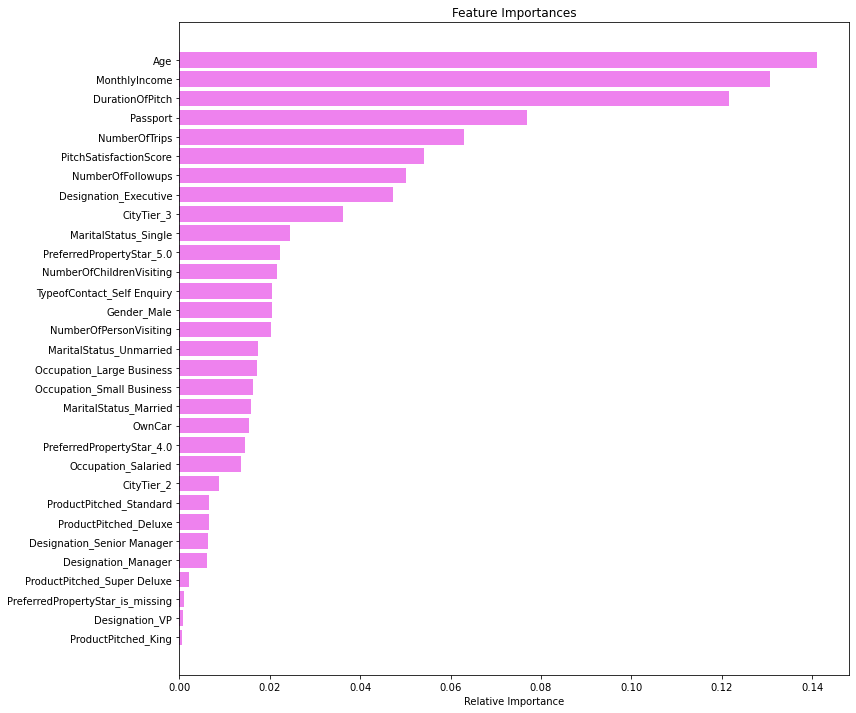

In [112]:
feature_names = X_train.columns
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Comparing all the models

In [113]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T,bagging_model_train_perf.T, bagging_weight_model_train_perf.T,rf_model_train_perf.T,
    rf_weight_model_train_perf.T,dtree_estimator_model_train_perf.T, bagging_estimator_model_train_perf.T,
     rf_estimator_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree  Bagging Classifier  Weighted Bagging Classifier  \
Accuracy             1.0            0.994081                     0.994410   
Recall               1.0            0.978297                     0.973289   
Precision            1.0            0.991540                     0.998288   
F1                   1.0            0.984874                     0.985630   

           Random Forest Classifier  Weighted Random Forest Classifier  \
Accuracy                        1.0                                1.0   
Recall                          1.0                                1.0   
Precision                       1.0                                1.0   
F1                              1.0                                1.0   

           Decision Tree Estimator  Bagging Estimator  Random Forest Estimator  
Accuracy                  0.196975                1.0                      1.0  
Recall                    1.000000                1.0                      1.0  
Precision                 0.196975                1.0                      1.0  
F1                        0.329121                1.0                      1.0

In [114]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,bagging_model_test_perf.T, bagging_weight_model_test_perf.T,rf_model_test_perf.T,
    rf_weight_model_test_perf.T,dtree_estimator_model_test_perf.T, bagging_estimator_model_test_perf.T,
     rf_estimator_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Decision Tree  Bagging Classifier  Weighted Bagging Classifier  \
Accuracy        0.881135            0.914110                     0.891104   
Recall          0.686992            0.670732                     0.581301   
Precision       0.684211            0.841837                     0.785714   
F1              0.685598            0.746606                     0.668224   

           Random Forest Classifier  Weighted Random Forest Classifier  \
Accuracy                   0.909509                           0.904908   
Recall                     0.573171                           0.520325   
Precision                  0.915584                           0.955224   
F1                         0.705000                           0.673684   

           Decision Tree Estimator  Bagging Estimator  Random Forest Estimator  
Accuracy                  0.188650           0.909509                 0.922546  
Recall                    1.000000           0.593496                 0.699187  
Precision                 0.188650           0.890244                 0.864322  
F1                        0.317419           0.712195                 0.773034

- All classes overfit the training data except the Decision Tree estimator
- Decision Tree estimator scores indicate a repeating error in the process
- Random Forest Estimate had the best overall scores while retaining high recall
- Because the final results depend on gridsearch there may be better parameters.

### Building Models: Adaboost, GradientBoost, XGBoost

#### Adaboost Classifier

In [115]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

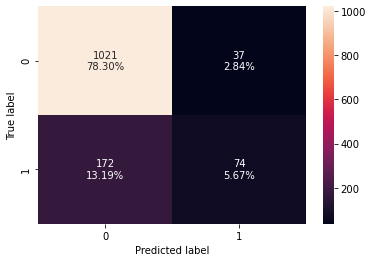

In [116]:
confusion_matrix_sklearn(abc, X_test,y_test)

- 5.67% True positive pedicted
- 13.19% False Positive predicted
- 78.30% True Negative Predicted
- 2.84% False negative predicted

In [117]:
abc_train_score= model_performance_classification_sklearn(abc, X_train,y_train)
print("Training performance \n",abc_train_score)

Training performance 
    Accuracy   Recall  Precision        F1
0  0.847419  0.36394   0.724252  0.484444


In [118]:
abc_test_score= model_performance_classification_sklearn(abc, X_test,y_test)
print("Testing performance \n",abc_test_score)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.839724  0.300813   0.666667  0.414566


**Insights:**
- while there is some variation in both scores, the low scores indicate there is not overfitting, the results are similar to each other which shows that the model is working well, however recall is very low

#### Gradient Boosting Classifier

In [119]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

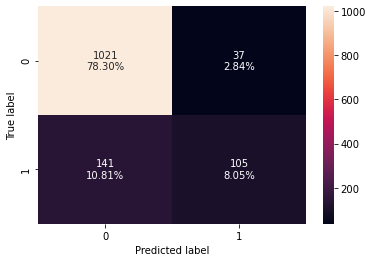

In [120]:
confusion_matrix_sklearn(gbc, X_test,y_test)

- 8.05% True positive pedicted
- 10.81% False Positive predicted
- 78.30% True Negative Predicted
- 2.84% False negative predicted

In [121]:
gbc_train_score= model_performance_classification_sklearn(gbc, X_train,y_train)
print("Training performance \n",gbc_train_score)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.893456  0.517529   0.898551  0.65678


In [122]:
gbc_test_score= model_performance_classification_sklearn(gbc, X_test,y_test)
print("Testing performance \n",gbc_test_score)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.863497  0.426829   0.739437  0.541237


**Insights:**
- Testing scores are low enough and close enough to testing scores to show some but not complete overfitting
- low recall but better than AdaBoost

#### GradientBoost ada Classifier

In [123]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

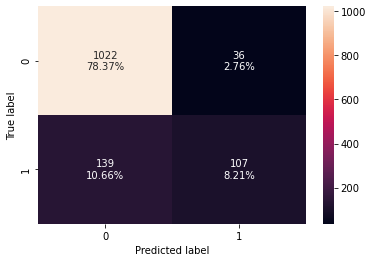

In [124]:
confusion_matrix_sklearn(gbc_init, X_test,y_test)

- 8.21% True positive pedicted
- 10.66% False Positive predicted
- 78.37% True Negative Predicted
- 2.76% False negative predicted

In [125]:
gbc_init_train_score= model_performance_classification_sklearn(gbc_init, X_train,y_train)
print("Training performance \n",gbc_init_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.889839  0.494157   0.902439  0.638619


In [126]:
gbc_init_test_score= model_performance_classification_sklearn(gbc_init, X_test,y_test)
print("Testing performance \n",gbc_init_test_score)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.865798  0.434959   0.748252  0.550129


**Insights:**
- Testing scores are low enough and close enough to testing scores to show some but not complete overfitting
- low recall but slightly better than normal GradientBoost

#### XGBoost Classifier

In [127]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

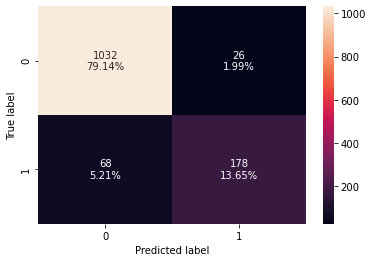

In [128]:
confusion_matrix_sklearn(xgb, X_test,y_test)

- 13.65% True positive pedicted
- 5.21% False Positive predicted
- 79.14% True Negative Predicted
- 1.99% False negative predicted

In [129]:
xgb_train_score= model_performance_classification_sklearn(xgb, X_train,y_train)
print("Training performance \n",xgb_train_score)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [130]:
xgb_test_score= model_performance_classification_sklearn(xgb, X_test,y_test)
print("Testing performance \n",xgb_test_score)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.927914  0.723577   0.872549  0.791111


**Insights:**
- Training performance indicates overfitting to training data
- Testing data boasts high accuracy, precision and recall, highest of all the merthods so far.

**With Default parameters:**
- XGBoost has the highest accuracy, recall, precision and f1 score
- The second highest is GradientBoost followed by Adaboost for all 3 scores.

### Tuning Models: Adaboost, GradientBoost, XGBoost

#### Tuning Adaboost

In [131]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1,base_estimator = DecisionTreeClassifier(random_state=1))

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator__max_depth": [1,2,3],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=1.3000000000000003, n_estimators=100,
                   random_state=1)

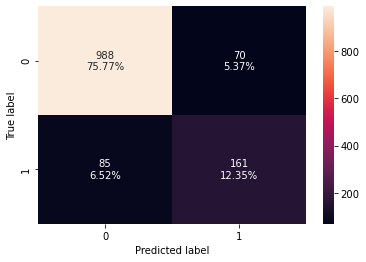

In [132]:
confusion_matrix_sklearn(abc_tuned, X_test,y_test)

- 12.35% True positive pedicted
- 6.52% False Positive predicted
- 75.77% True Negative Predicted
- 5.37% False negative predicted

In [133]:
abc_tuned_train_score= model_performance_classification_sklearn(abc_tuned, X_train,y_train)
print("Training performance \n",abc_tuned_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.999013  0.996661   0.998328  0.997494


In [134]:
abc_tuned_test_score= model_performance_classification_sklearn(abc_tuned, X_test,y_test)
print("Testing performance \n",abc_tuned_test_score)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.881135  0.654472    0.69697  0.675052


**Insights:**
- much higher training scores compared to the classic classifier, this may be due to overfitting of the data
- recall significantly improved in the testing data while precision stayed the same.

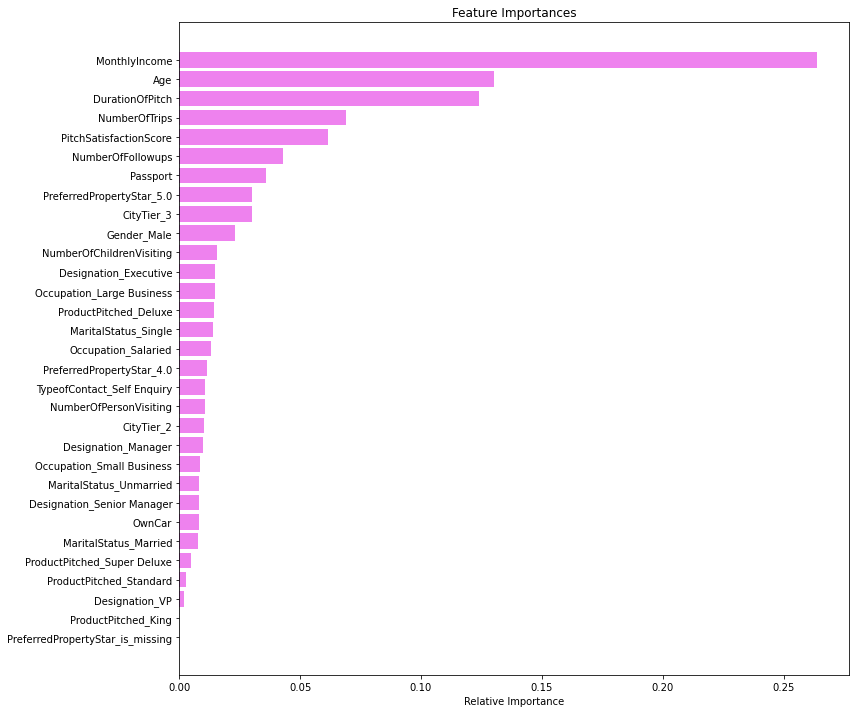

In [135]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Tuning GradientBoost 

In [136]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=0.8)

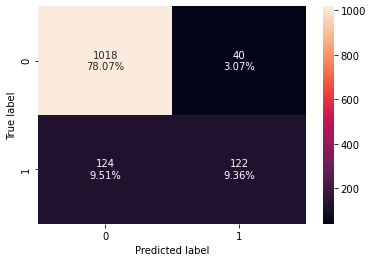

In [137]:
confusion_matrix_sklearn(gbc_tuned, X_test,y_test)

- 9.36% True positive pedicted
- 9.51% False Positive predicted
- 78.07% True Negative Predicted
- 3.07% False negative predicted

In [138]:
gbc_tuned_train_score= model_performance_classification_sklearn(gbc_tuned, X_train,y_train)
print("Training performance \n",gbc_tuned_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.930286  0.677796   0.955294  0.792969


In [139]:
gbc_tuned_test_score= model_performance_classification_sklearn(gbc_tuned, X_test,y_test)
print("Testing performance \n",gbc_tuned_test_score)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.874233  0.495935   0.753086  0.598039


**Insights:**
- High accuracy and precision in the training data, recall and precision dropped signnificantly in the testing data which i s a sign of overfitting. Overall did worse than the Adaboost tuned.

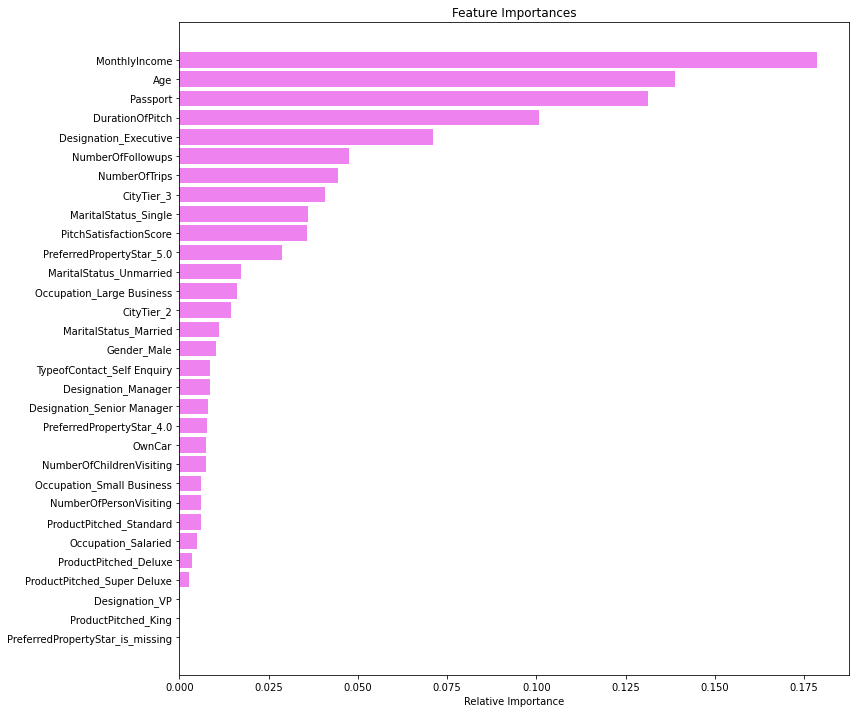

In [140]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Tuning XGBoost

In [141]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=0.5, eval_metric='logloss',
              gamma=3, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=70, n_jobs=12,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

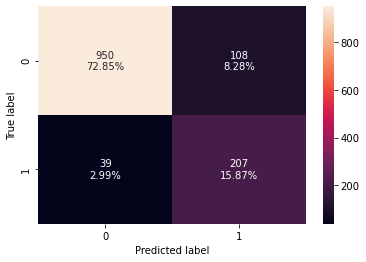

In [142]:
confusion_matrix_sklearn(xgb_tuned, X_test,y_test)

- 15.87% True positive pedicted
- 2.99% False Positive predicted
- 72.85% True Negative Predicted
- 8.28% False negative predicted

In [143]:
xgb_tuned_train_score= model_performance_classification_sklearn(xgb_tuned, X_train,y_train)
print("Training performance \n",xgb_tuned_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.962512  0.996661   0.842031  0.912844


In [144]:
xgb_tuned_test_score= model_performance_classification_sklearn(xgb_tuned, X_test,y_test)
print("Testing performance \n",xgb_tuned_test_score)

Testing performance 
    Accuracy    Recall  Precision        F1
0   0.88727  0.841463   0.657143  0.737968


**Insights:**
- very high training results, while the testing results were lower they still remained high. This shows potential overfitting in the training data

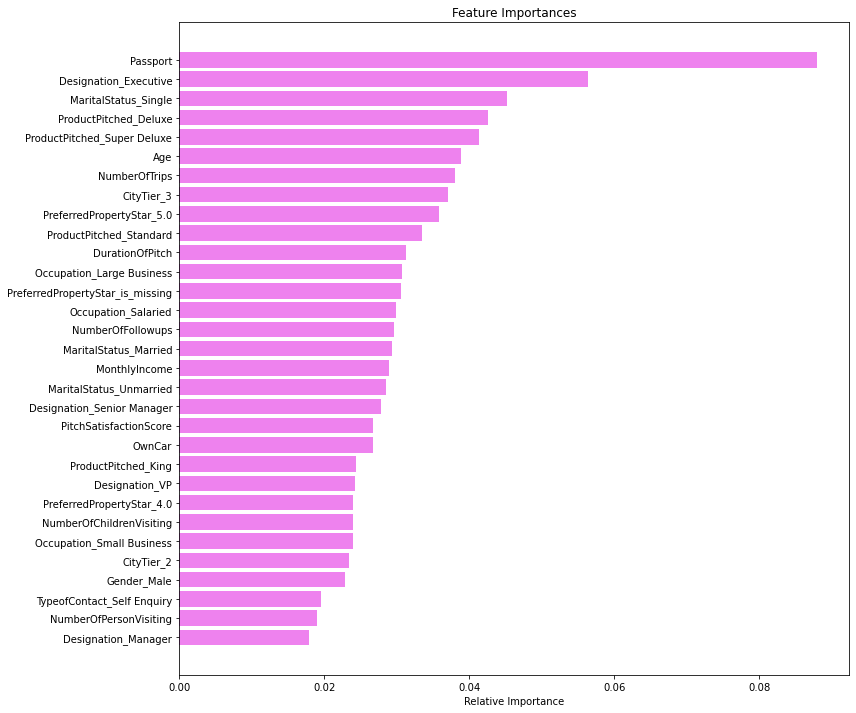

In [145]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [146]:
# training performance comparison

models_train_comp_df = pd.concat(
    [abc_train_score.T,gbc_train_score.T, gbc_init_train_score.T,xgb_train_score.T,
    abc_tuned_train_score.T,gbc_tuned_train_score.T, xgb_tuned_train_score.T],
    axis=1,
)
models_train_comp_df.columns = [
    "AdaBoost Classifier",
    "GradientBoost Classifier",
    "GradientBoost ADA Classifier",
    "XGBoost Classifier",
    "Tuned AdaBoost Classifier",
    "Tuned GradientBoost Classifier",
    "Tuned XGBoost Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


AdaBoost Classifier  GradientBoost Classifier  \
Accuracy              0.847419                  0.893456   
Recall                0.363940                  0.517529   
Precision             0.724252                  0.898551   
F1                    0.484444                  0.656780   

           GradientBoost ADA Classifier  XGBoost Classifier  \
Accuracy                       0.889839                 1.0   
Recall                         0.494157                 1.0   
Precision                      0.902439                 1.0   
F1                             0.638619                 1.0   

           Tuned AdaBoost Classifier  Tuned GradientBoost Classifier  \
Accuracy                    0.999013                        0.930286   
Recall                      0.996661                        0.677796   
Precision                   0.998328                        0.955294   
F1                          0.997494                        0.792969   

           Tuned XGBoost Classifier  
Accuracy                   0.962512  
Recall                     0.996661  
Precision                  0.842031  
F1                         0.912844

In [147]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [abc_test_score.T,gbc_test_score.T, gbc_init_test_score.T,xgb_test_score.T,
    abc_tuned_test_score.T,gbc_tuned_test_score.T, xgb_tuned_test_score.T],
    axis=1,
)
models_test_comp_df.columns = [
    "AdaBoost Classifier",
    "GradientBoost Classifier",
    "GradientBoost ADA Classifier",
    "XGBoost Classifier",
    "Tuned AdaBoost Classifier",
    "Tuned GradientBoost Classifier",
    "Tuned XGBoost Classifier"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


AdaBoost Classifier  GradientBoost Classifier  \
Accuracy              0.839724                  0.863497   
Recall                0.300813                  0.426829   
Precision             0.666667                  0.739437   
F1                    0.414566                  0.541237   

           GradientBoost ADA Classifier  XGBoost Classifier  \
Accuracy                       0.865798            0.927914   
Recall                         0.434959            0.723577   
Precision                      0.748252            0.872549   
F1                             0.550129            0.791111   

           Tuned AdaBoost Classifier  Tuned GradientBoost Classifier  \
Accuracy                    0.881135                        0.874233   
Recall                      0.654472                        0.495935   
Precision                   0.696970                        0.753086   
F1                          0.675052                        0.598039   

           Tuned XGBoost Classifier  
Accuracy                   0.887270  
Recall                     0.841463  
Precision                  0.657143  
F1                         0.737968

- All classifiers suffered in recall when comparing training sets to testing sets
- Tuned XGBoost had the highest recall in the testing set
- The classic Xgboost had the highest Accuracy and Precision in the testing set.

## Business Insights and Recommendations

- we have been able to build a predictive model that can help the company identify customers who would buy the package they want to send out
- the company can use the model to find the key characteristics of customers they should look for in the market
- the company can focus their campaigns and advertisements to reach out to a certain kind of customer to increase the sales of their package.

- Factors that drive buying the package: Passport, Designation and MaritalStatus.

- `Passport`: Customers who have passports buy the package more - the company can provide incentives for customers who have passports

- `Designation`: Customers who have a designation of Executive at their current job buy the package more - the company can focus their next advertising or marketting campaign to draw in more executives

- `MaritalStatus`: Customers who are single are buy the package more - this can also be targetted in an ad campagin for single Execs. 

- `NumberOfFollowUps`: While this factor is not as important as some others, Customers that had more followups were buying the package more. - The company can add new policy to require followups.

- `Age`: Younger customers are buying the package more. - The company can target their advertisement and marketting campagins to reach out to these customers

- `MonthlyIncome`: Customers with a lower monthly income buy the package more. - While this is more difficult to apply as employees do not know the monthly income till after the fact, this may be useful in targetting advertisment campaigns.

- `DurationOfPitch`: Customers who had a longer duration of pitch bought the package more. - The company can change internal policy and/or scripts to increase the engagement and length of time an employee speaks to a customer.

- `NumberOfChildrenVisiting`, `PitchSatisfactionScore`, `OwnCar` and `NumberOfTrips` does not seem to have an impact on whether the package is bought. - The company should investigate this, if they are offering any incentives for these and they do not impact the chances of buying the package then better cost planning can be done.

- `PrefferedPropertyStar`: Customers looking for a 5 star property would buy the package. - The company can tailor the packages or add incentives for those looking for a 5 star propery.

- `Occupation`: Customers that work for Large Business' buy the product more. - The company can reach out to large business' to tailor packages or provide employee incentives to take their package. 

- Tuned XGBoost boasts the highest recall while retaining the integrity of the other scores which makes it the best predidictive model  for predicitng whether a customer will or wont buy a package. This was done via gridsearch however, so more optimal paramaters may be possible.